# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**
1. área del inmueble
2. tipo de inmueble. Apartamento, casa, lote, etc
3. edad del inmueble
4. ubicación del inmueble (barrio, zona, ciudad)
5. oferta de inmuebles en la redonda. ¿cuantos inmuebles hay a la venta en el área? ¿la oferta es muy alta?
6. Usos inmobiliarios complementarios cerca al inmueble. Centros comerciales, colegios, clinicas, oficinas, parques industriales, etc.
7. Vias de acceso y transporte publico.
8. acceso a servicios publicos.
9. tratamiento urbanistico de la zona del inmueble. Zona consolidada, zona en espansión, zona en desarrollo, zona en recuperacion, etc.
10. norma urbanistica de la zona. Máxima altura permitida, densidad permitida, máximo indice de construcción, usos permitidos.

Estos datos son importantes, ya que permiten abordar varios aspectos técnicos, urbanisticos, de mercado y financieros. De esta manera, se crea un analisis holístico del inmueble.
No obstante, según mi experiencia en el sector inmobiliario, el analisis de inmuebles para personas naturales es muy diferente de el análisis que se hace para inversionistas institutionales o profesionales, puesto que los primeros no suelen analizar tantos factores.

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
import os 
print(os.getcwd())


/content


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#para mostrar todos los valores o algunos. Lo use mas adelante para comparar que los quintiles realizados por la formula estuvieran bien con las propeidades y price_per_sqm
#los valores default estan en la ayuda de colab, pero si quiero ver todas las celdas, coloco None en donde estan los numeros
pd.set_option('display.max_rows', 60) #60 default value
pd.set_option('display.max_columns', 0) #0 default value
pd.set_option('display.width',80) #80 default values
pd.set_option('display.max_colwidth', 50)  #50 default value

In [5]:
properati = pd.read_csv('/content/gdrive/My Drive/Data Sets/DS_Proyecto_01_Datos_Properati.csv')
properati.head(6)

start_date    end_date  ... property_type  operation_type
0  2019-10-17  2019-12-23  ...  Departamento           Venta
1  2019-10-17  2019-11-21  ...            PH           Venta
2  2019-10-17  2019-11-01  ...            PH           Venta
3  2019-10-17  2019-12-23  ...            PH           Venta
4  2019-10-17  2020-03-11  ...            PH           Venta
5  2019-10-17  2019-11-01  ...            PH           Venta

[6 rows x 19 columns]

In [6]:
properati.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [7]:
#numero de filas y de columnas
properati.shape

(146660, 19)

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [ ]:
properati.count(axis = "index")

start_date         146660
end_date           146660
created_on         146660
lat                136735
lon                136701
l1                 146660
l2                 146660
l3                 146660
rooms              146660
bedrooms           146660
bathrooms          140703
surface_total      126133
surface_covered    125046
price              146660
currency           146660
title              146660
description        146660
property_type      146660
operation_type     146660
dtype: int64

In [8]:
properati.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [10]:
properati.isna().sum()/properati.shape[0]*100

start_date          0.000000
end_date            0.000000
created_on          0.000000
lat                 6.767353
lon                 6.790536
l1                  0.000000
l2                  0.000000
l3                  0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           4.061776
surface_total      13.996318
surface_covered    14.737488
price               0.000000
currency            0.000000
title               0.000000
description         0.000000
property_type       0.000000
operation_type      0.000000
dtype: float64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [ ]:
properati_dataframe = pd.DataFrame(properati)
properati_dataframe["property_type"] = properati_dataframe["property_type"].astype(str)
properati_dataframe.head(3)

start_date    end_date  ... property_type  operation_type
0  2019-10-17  2019-12-23  ...  Departamento           Venta
1  2019-10-17  2019-11-21  ...            PH           Venta
2  2019-10-17  2019-11-01  ...            PH           Venta

[3 rows x 19 columns]

In [ ]:
# esto lo sacamos ya que mas adelante necesito hacer calculos con las fechas
properati_dataframe.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

In [ ]:
#resumen de tipos de propiedades
pd.unique(properati_dataframe["property_type"])

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

In [ ]:
#cantidad de instancias por cada tipo de propiedades. la formula rename_axis y reset_index son para que el dataframe tenga dos columnas en vez de una
resumen_propiedades = properati_dataframe.value_counts("property_type",ascending=False).rename_axis("property_type").reset_index(name="counts")
print(resumen_propiedades)
# se coloca NORMALIZE=TRUE para tener la magnitud porcentual de la muestra

print(properati_dataframe.value_counts("property_type",ascending=False,normalize=True).rename_axis("property_type").reset_index(name="counts_percentage"))

     property_type  counts
0     Departamento  107326
1             Casa   21521
2               PH   14298
3             Lote    1312
4          Oficina     658
5             Otro     374
6  Local comercial     325
7    Casa de campo     322
8         Depósito     265
9          Cochera     259
     property_type  counts_percentage
0     Departamento           0.731801
1             Casa           0.146741
2               PH           0.097491
3             Lote           0.008946
4          Oficina           0.004487
5             Otro           0.002550
6  Local comercial           0.002216
7    Casa de campo           0.002196
8         Depósito           0.001807
9          Cochera           0.001766


In [ ]:
resumen_propiedades_dataframe = pd.DataFrame(resumen_propiedades)
resumen_propiedades_dataframe.shape

(10, 2)

In [ ]:
#se observa que el tipo de dato de la columna property_type es un objeto. Para poder graficar necesito que esa columna sea un string. 
print(resumen_propiedades_dataframe.dtypes)
# asi que a continuacion se convierte esa columna a str. Sin embargo, los datos siguen siendo OBJECT y no STRING
resumen_propiedades_dataframe.property_type.apply(str)
print(resumen_propiedades_dataframe.dtypes)

property_type    object
counts            int64
dtype: object
property_type    object
counts            int64
dtype: object


In [ ]:
#no entiendo porque no funciona. Aparece error de que la variable debe ser un STRING
#grafica_tipo_propiedad_1 = sns.barplot(x = "counts", Y ="property_type" , kind = "bar", data = resumen_propiedades_dataframe)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

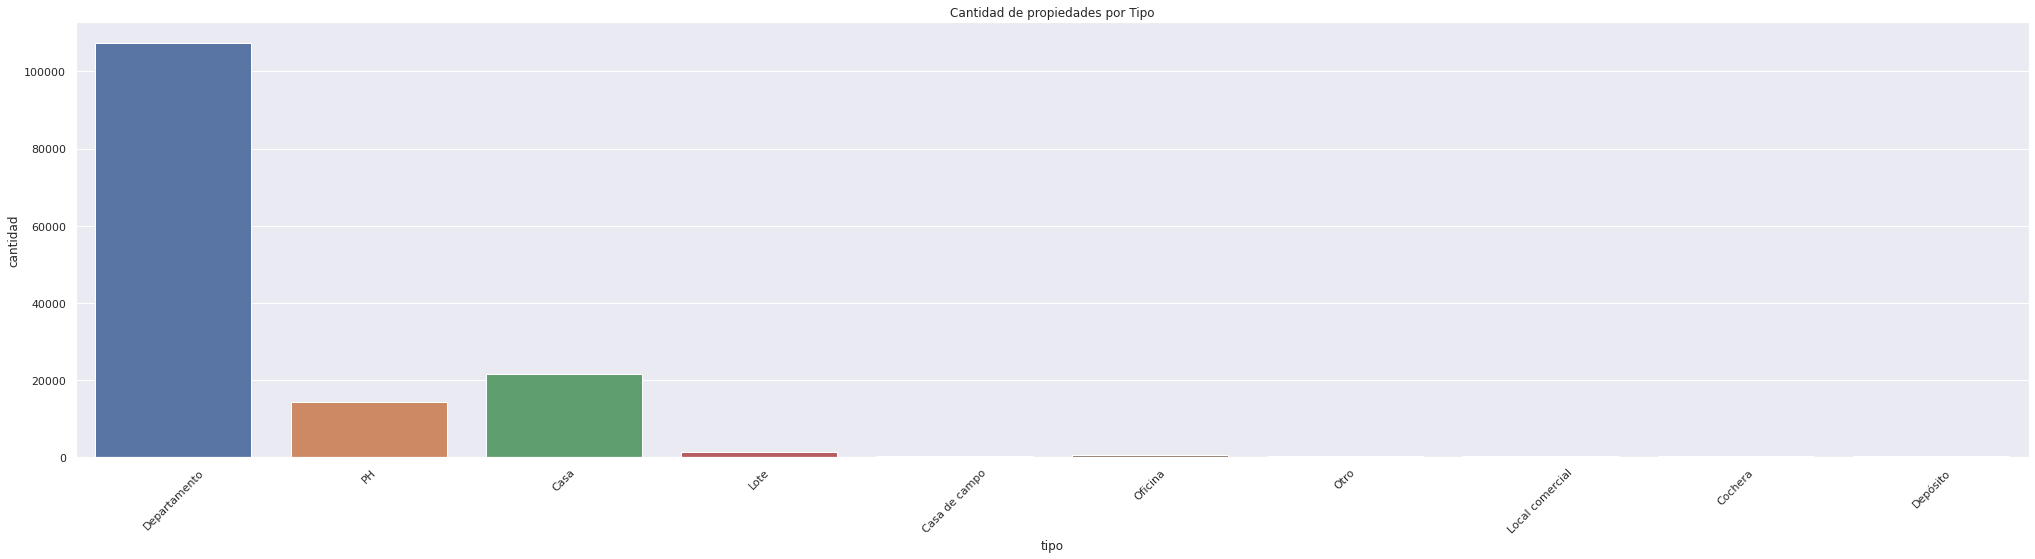

In [ ]:
#otra forma de hacer la grafica
grafica_tipo_propiedad_2 = sns.countplot(properati["property_type"])
plt.xticks(rotation = 45) #rota los nombres del eje X en 45 grados
grafica_tipo_propiedad_2.set_title("Cantidad de propiedades por Tipo")
grafica_tipo_propiedad_2.set(xlabel="tipo",ylabel="cantidad")
plt.show

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [ ]:
#zona de las publicaciones
resumen_zona = properati_dataframe.value_counts("l2",ascending=False).rename_axis("zone").reset_index(name="counts")
print(resumen_zona)
print(resumen_zona.shape)

                       zone  counts
0           Capital Federal   92539
1  Bs.As. G.B.A. Zona Norte   24282
2    Bs.As. G.B.A. Zona Sur   17173
3  Bs.As. G.B.A. Zona Oeste   12666
(4, 2)


In [ ]:
#sub zona de las publicaciones
resumen_subzona = properati_dataframe.value_counts("l3",ascending=False).rename_axis("subzone").reset_index(name="counts")
print(resumen_subzona)
print(resumen_subzona.shape)

# se coloca NORMALIZE=TRUE para tener la magnitud porcentual de la muestra
print(properati_dataframe.value_counts("l3",ascending=False,normalize=True).rename_axis("subzone").reset_index(name="counts_percentage").head(12))
print(properati_dataframe.value_counts("l3",ascending=False,normalize=True).rename_axis("subzone").reset_index(name="counts_percentage").head(12).sum())
#los primeros 12 valores suman el 50% de la participacion de todas las subzonas.

            subzone  counts
0           Palermo   13073
1             Tigre    8718
2           Almagro    7527
3          Belgrano    6935
4         Caballito    6650
..              ...     ...
84         Cañuelas     108
85    Villa Soldati      69
86  Villa Riachuelo      42
87       Marcos Paz      35
88        Catalinas       5

[89 rows x 2 columns]
(89, 2)
            subzone  counts_percentage
0           Palermo           0.089138
1             Tigre           0.059444
2           Almagro           0.051323
3          Belgrano           0.047286
4         Caballito           0.045343
5      Villa Crespo           0.044279
6          Recoleta           0.040345
7          La Plata           0.029688
8        La Matanza           0.025617
9             Pilar           0.025290
10  Lomas de Zamora           0.024540
11    Villa Urquiza           0.022767
subzone              PalermoTigreAlmagroBelgranoCaballitoVilla Cres...
counts_percentage                                      

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

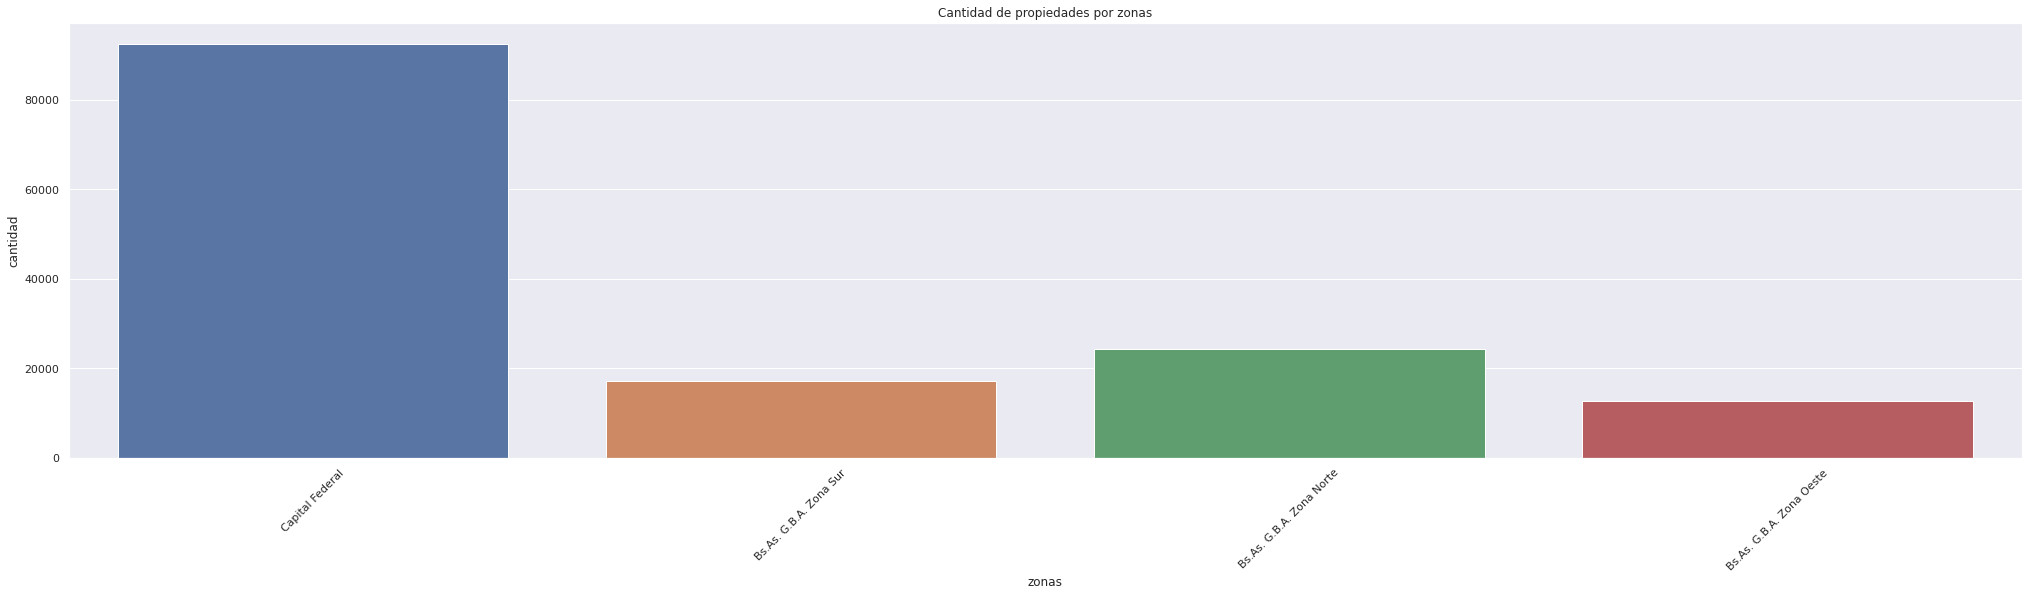

In [ ]:
#grafica de Zonas
#otra forma de hacer la grafica
grafica_zona = sns.countplot(properati["l2"])
plt.xticks(rotation = 45) #rota los nombres del eje X en 45 grados
grafica_zona.set_title("Cantidad de propiedades por zonas")
grafica_zona.set(xlabel="zonas",ylabel="cantidad")
plt.show

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

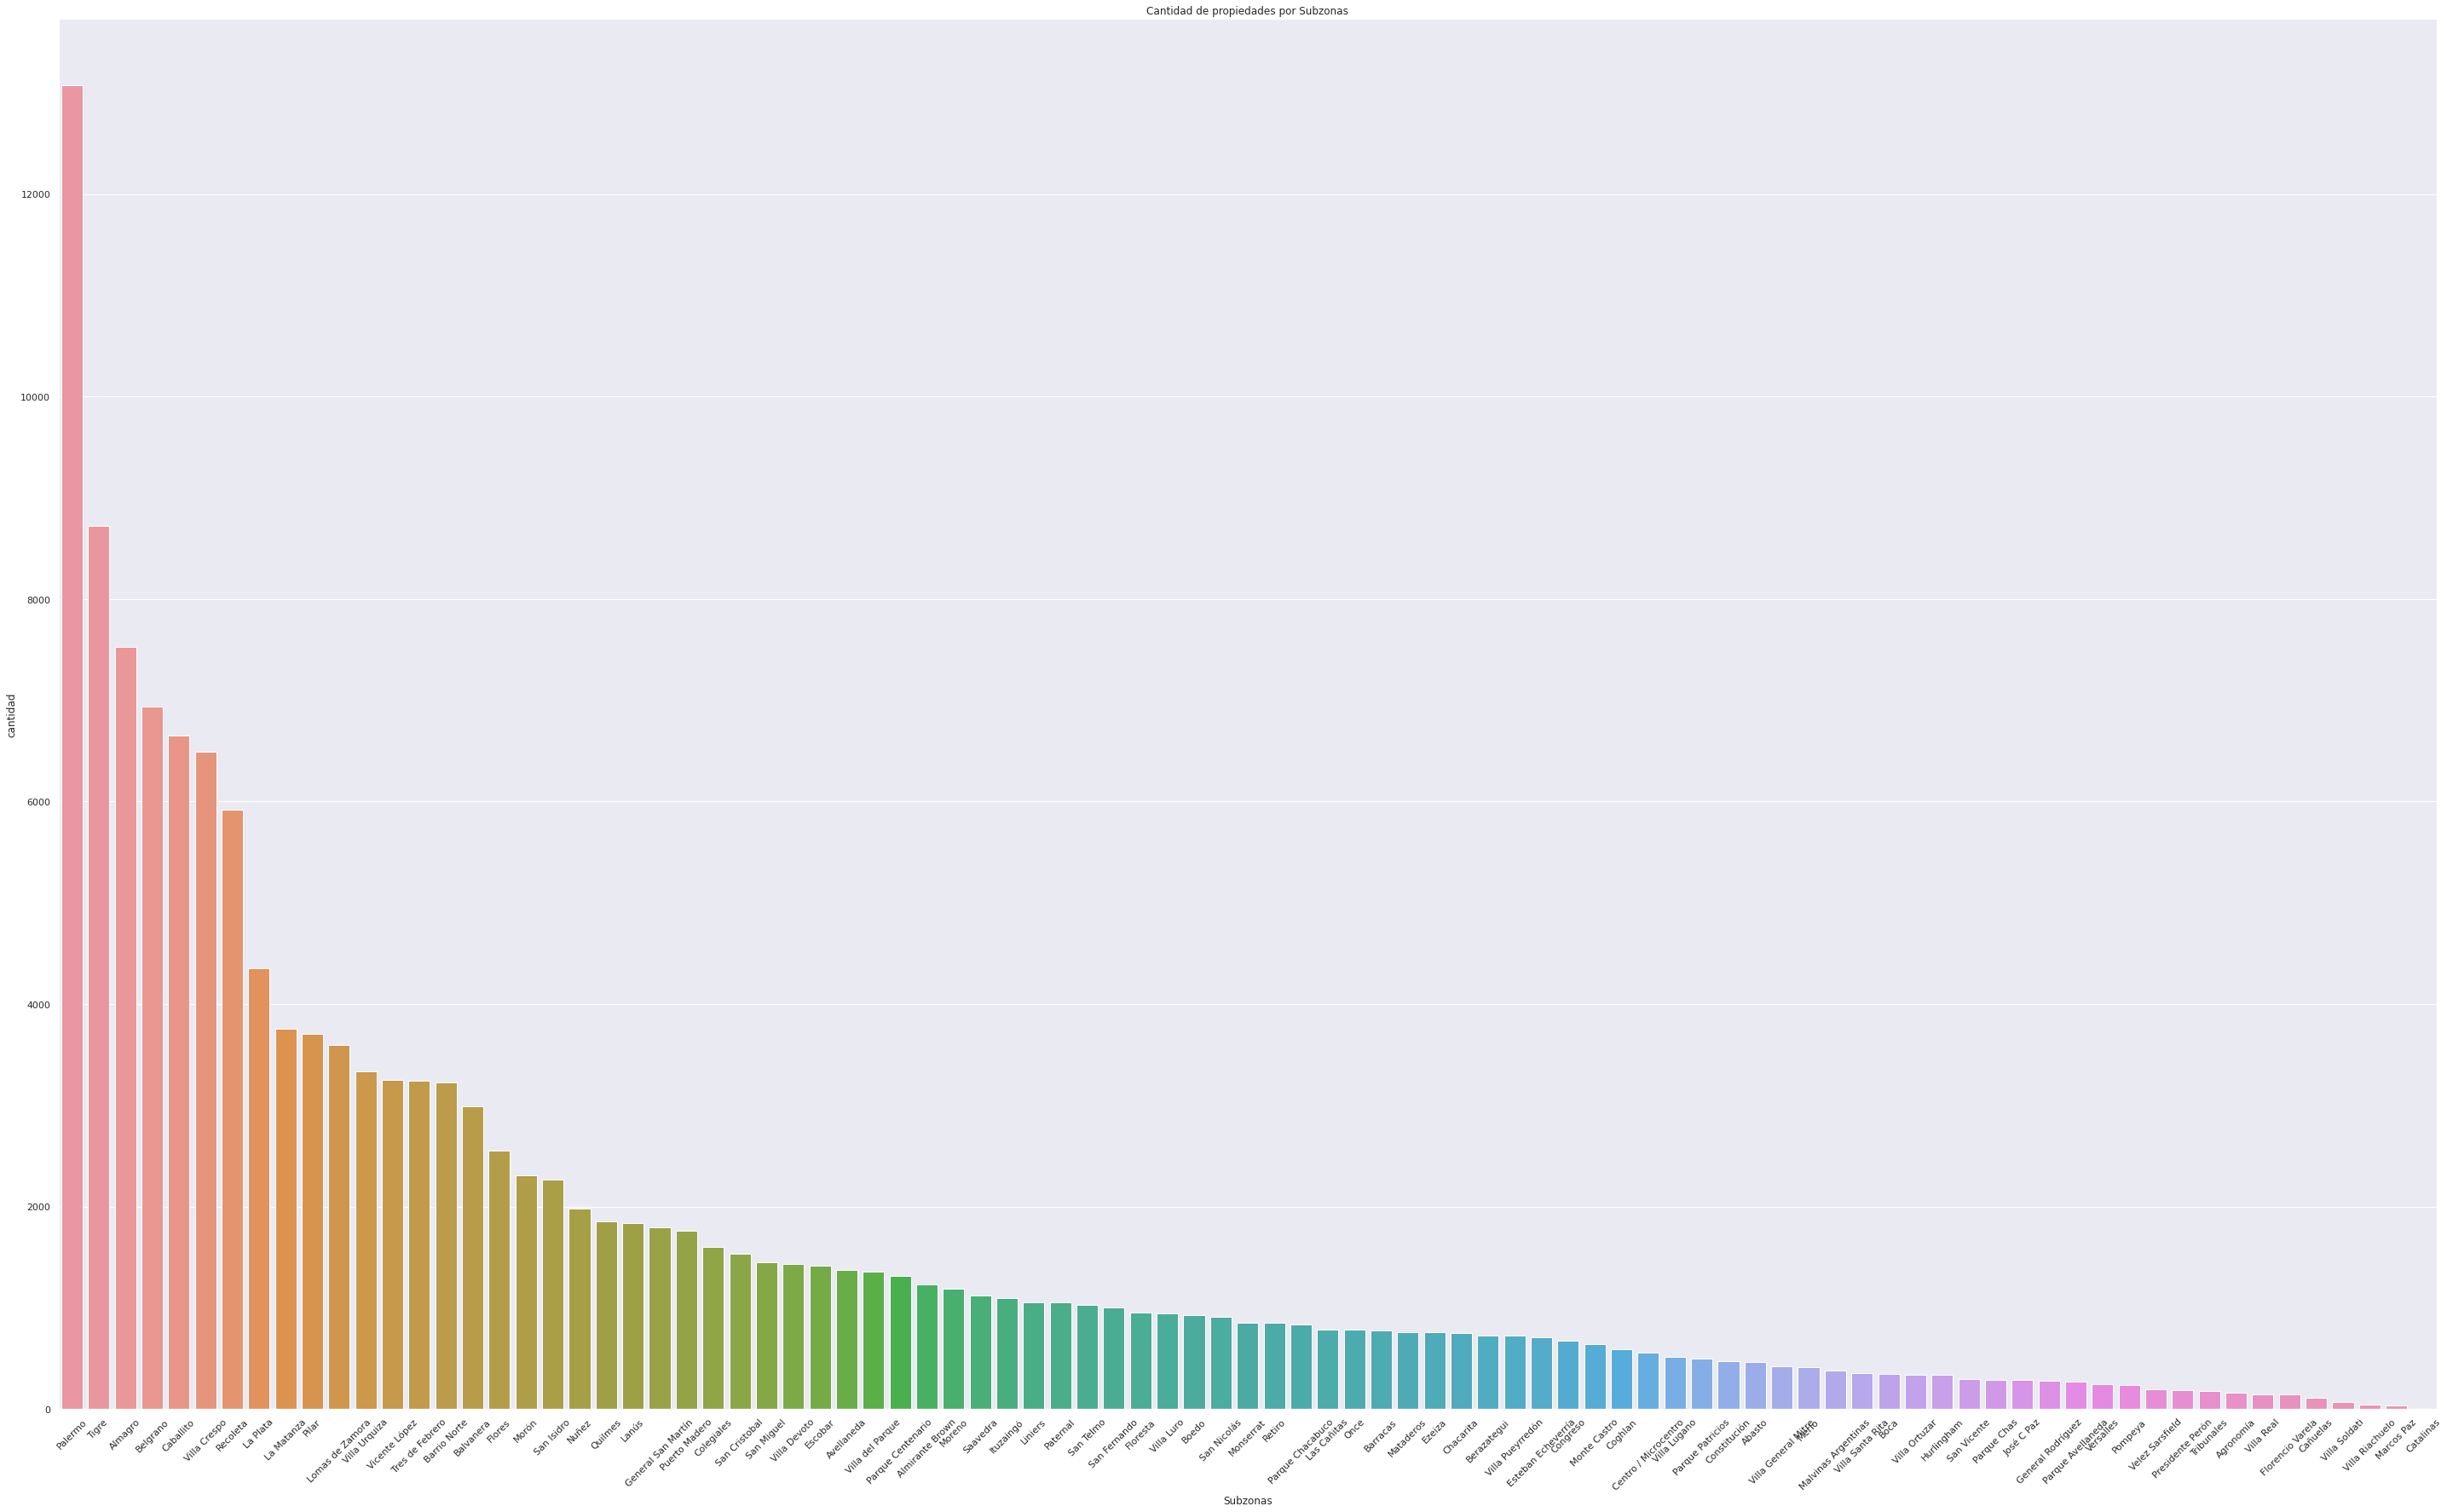

In [ ]:
#grafica de subzonas
#otra forma de hacer la grafica
grafica_zona = sns.countplot(properati["l3"], order=properati["l3"].value_counts().sort_values(ascending = False).index)

plt.xticks(rotation = 45) #rota los nombres del eje X en 45 grados
grafica_zona.set_title("Cantidad de propiedades por Subzonas")
grafica_zona.set(xlabel="Subzonas",ylabel="cantidad")
tamaño_grafica_zona = plt.gcf()
tamaño_grafica_zona.set_size_inches( 50, 30)
plt.show

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [ ]:
properati_dataframe.shape

(146660, 19)

In [ ]:
#  evidentemente los tipos de propiedades con más datos son:
#       property_type  counts
# 0     Departamento  107326
# 1             Casa   21521
# 2               PH   14298

#es decir que se van a eliminar los siguientes tipos de propiedades: 
# 3             Lote    1312
# 4          Oficina     658
# 5             Otro     374
# 6  Local comercial     325
# 7    Casa de campo     322
# 8         Depósito     265
# 9          Cochera     259

# nuevo data frame solo con estos tipos de propiedades, para luego determinar las regiones y subregiones más relevantes

nombre_filtros = properati_dataframe[ (properati_dataframe["property_type"] == "Oficina")].index
properati_dataframe.drop(nombre_filtros, inplace = True) 


nombre_filtros = properati_dataframe[ (properati_dataframe["property_type"] == "Lote")].index
properati_dataframe.drop(nombre_filtros, inplace = True) 

nombre_filtros = properati_dataframe[ (properati_dataframe["property_type"] == "Otro")].index
properati_dataframe.drop(nombre_filtros, inplace = True) 

nombre_filtros = properati_dataframe[ (properati_dataframe["property_type"] == "Local comercial")].index
properati_dataframe.drop(nombre_filtros, inplace = True) 

nombre_filtros = properati_dataframe[ (properati_dataframe["property_type"] == "Casa de campo")].index
properati_dataframe.drop(nombre_filtros, inplace = True) 

nombre_filtros = properati_dataframe[ (properati_dataframe["property_type"] == "Depósito")].index
properati_dataframe.drop(nombre_filtros, inplace = True) 

nombre_filtros = properati_dataframe[ (properati_dataframe["property_type"] == "Cochera")].index
properati_dataframe.drop(nombre_filtros, inplace = True) 

properati_dataframe.shape



(143145, 19)

In [ ]:
# ahora se va a dejar unicamente la zona con mas propiedades. es decir:
#                        zone  counts
# 0           Capital Federal   92539

# mientras que estas zonas se van a eliminar
# 1  Bs.As. G.B.A. Zona Norte   24282
# 2    Bs.As. G.B.A. Zona Sur   17173
# 3  Bs.As. G.B.A. Zona Oeste   12666

nombre_filtros = properati_dataframe[ (properati_dataframe["l2"] == "Bs.As. G.B.A. Zona Norte")].index
properati_dataframe.drop(nombre_filtros, inplace = True) 

nombre_filtros = properati_dataframe[ (properati_dataframe["l2"] == "Bs.As. G.B.A. Zona Sur")].index
properati_dataframe.drop(nombre_filtros, inplace = True) 

nombre_filtros = properati_dataframe[ (properati_dataframe["l2"] == "Bs.As. G.B.A. Zona Oeste")].index
properati_dataframe.drop(nombre_filtros, inplace = True) 

properati_dataframe.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [ ]:
# estadisticos de la base
properati_dataframe.describe()

lat           lon  ...  surface_covered         price
count  86951.000000  86937.000000  ...     82250.000000  9.148500e+04
mean     -34.599081    -58.436002  ...        94.966310  2.595003e+05
std        0.023957      0.036297  ...       778.515243  3.222654e+05
min      -34.696419    -58.530468  ...         1.000000  6.000000e+03
25%      -34.613757    -58.459605  ...        44.000000  1.200000e+05
50%      -34.599446    -58.433789  ...        63.000000  1.750000e+05
75%      -34.584148    -58.410143  ...        96.000000  2.790000e+05
max      -34.535818    -58.353930  ...    126062.000000  3.243423e+07

[8 rows x 8 columns]

<function matplotlib.pyplot.show>

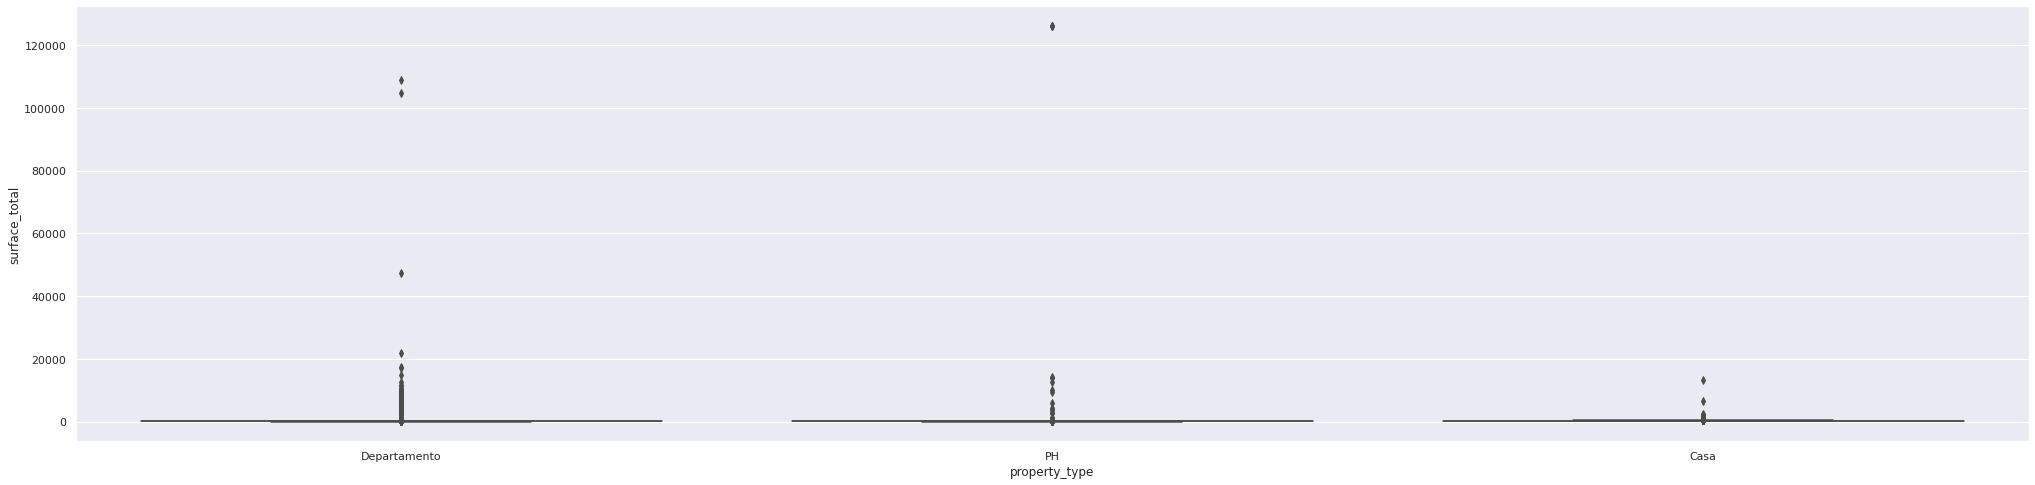

In [ ]:
#boxplot para determinar un nuevo filtro a la base de datos que alimine los valores muy grandes de la columna surface_total

sns.boxplot(data = properati_dataframe, x = "property_type" , y = "surface_total")
plt.show

In [ ]:
# de la grafica de boxplot anterior, se podría decir que podriamos filtrar los valores superiores a 500

nombre_filtros = properati_dataframe[ (properati_dataframe["surface_total"] >= 500)].index
properati_dataframe.drop(nombre_filtros, inplace = True) 

properati_dataframe.shape


(90906, 19)

<function matplotlib.pyplot.show>

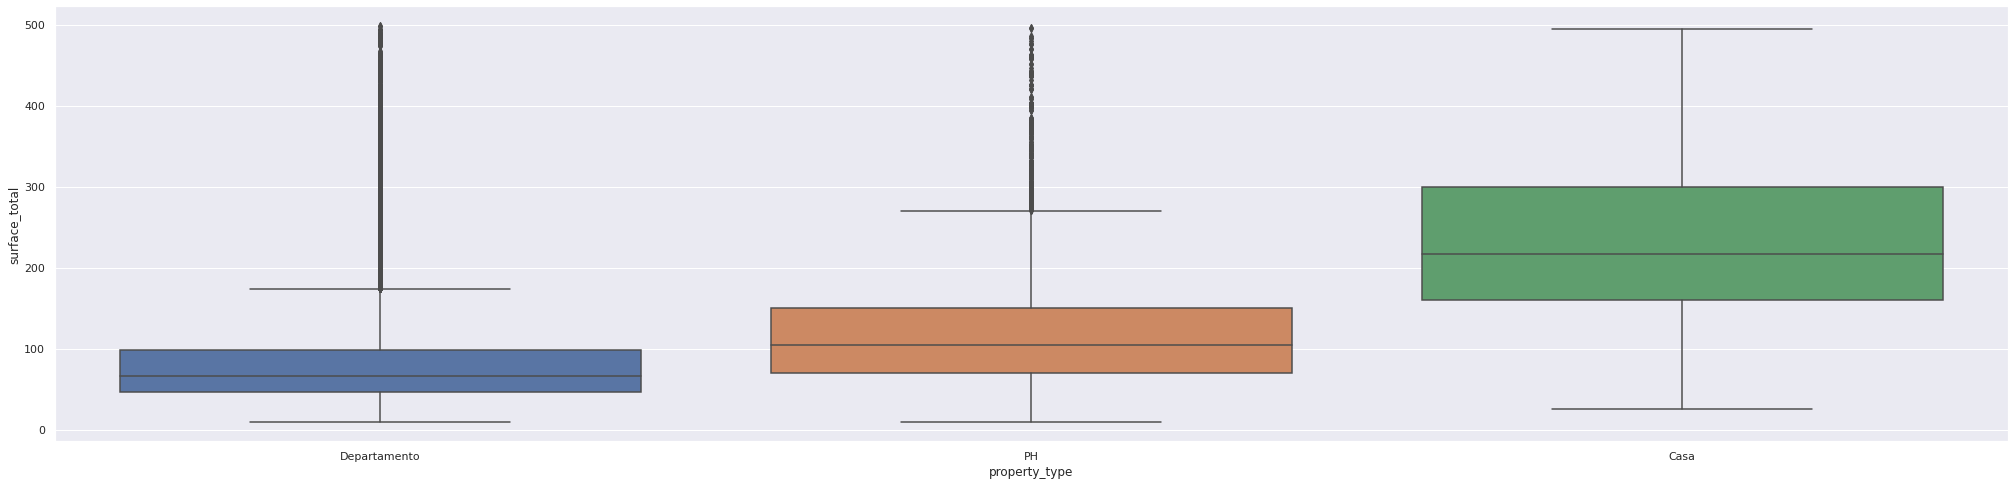

In [ ]:
#graficamos nuevamente para confirmar
#sin embargo se puede apreciar que será mejor filtrar por tipo de propiedad, ya que la grafica muestra que para los DEPARTAMENTOS 
# y para los PH, aun hay muchos datos que se salen de los cuartiles que nos interesan.

sns.boxplot(data = properati_dataframe, x = "property_type" , y = "surface_total")
plt.show

(85519, 19)


<function matplotlib.pyplot.show>

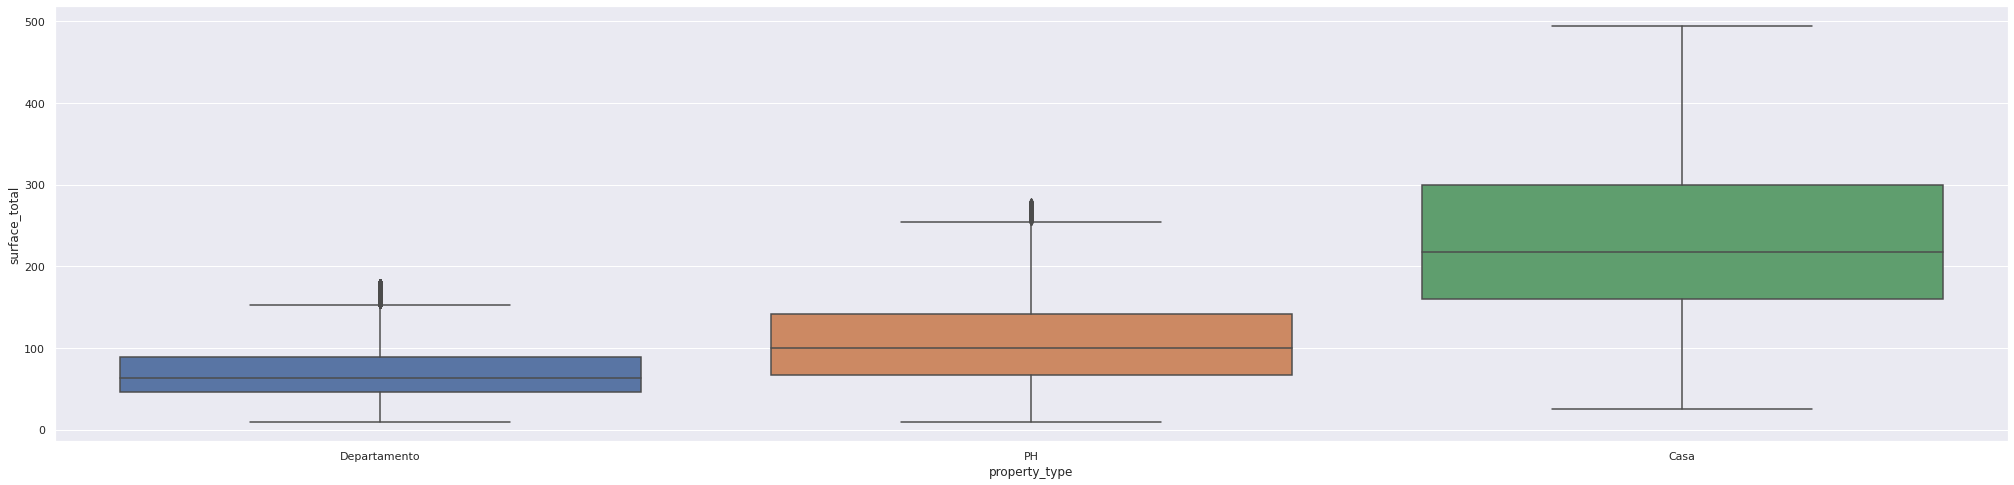

In [ ]:
#filtramos por tipos de propiedad y por surface_total. se quitan maximos

nombre_filtros = properati_dataframe[ (properati_dataframe["surface_total"] >= 180)  & (properati_dataframe["property_type"] == "Departamento")].index
properati_dataframe.drop(nombre_filtros, inplace = True) 

nombre_filtros = properati_dataframe[ (properati_dataframe["surface_total"] >= 280) & (properati_dataframe["property_type"] == "PH")].index
properati_dataframe.drop(nombre_filtros, inplace = True) 

print(properati_dataframe.shape)

# y volvemos a graficar
sns.boxplot(data = properati_dataframe, x = "property_type" , y = "surface_total")
plt.show



(82758, 19)


<function matplotlib.pyplot.show>

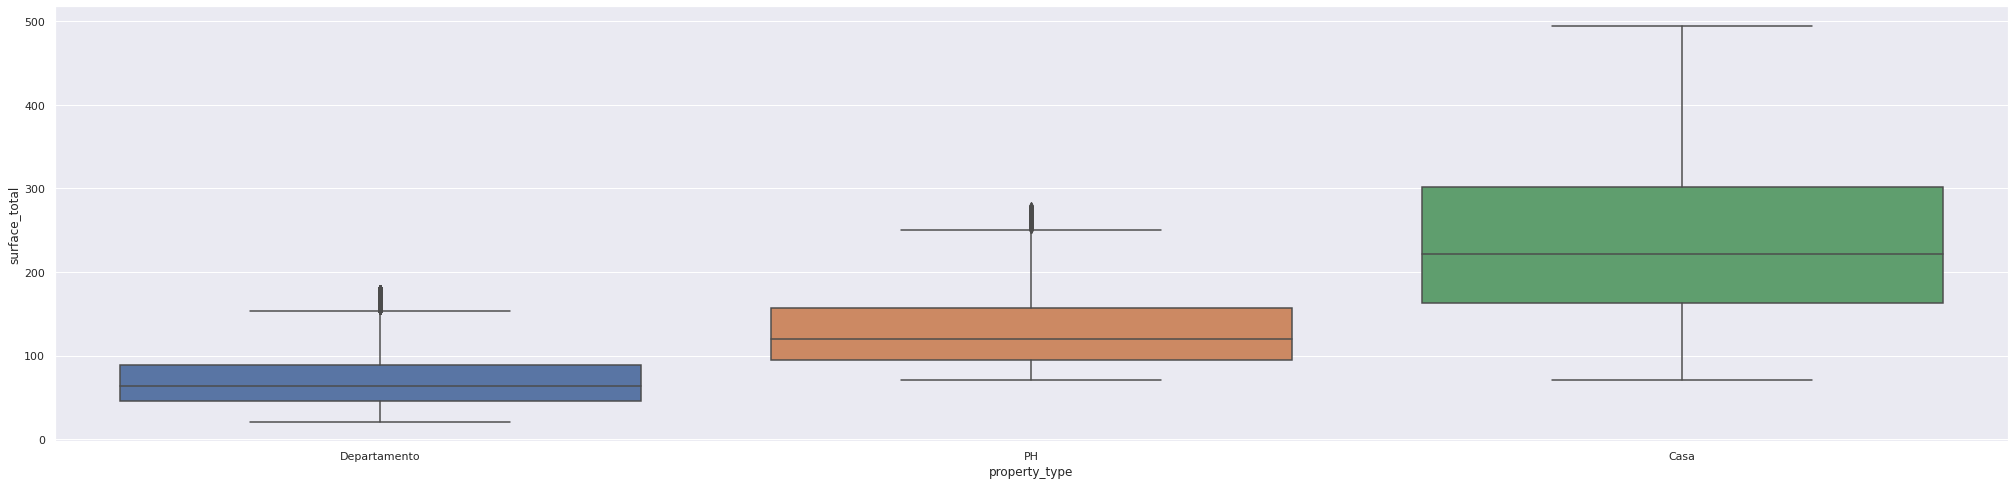

In [ ]:
# se quitan minimos del data set

nombre_filtros = properati_dataframe[ (properati_dataframe["surface_total"] <= 20)  & (properati_dataframe["property_type"] == "Departamento")].index
properati_dataframe.drop(nombre_filtros, inplace = True) 

nombre_filtros = properati_dataframe[ (properati_dataframe["surface_total"] <= 70) & (properati_dataframe["property_type"] == "PH")].index
properati_dataframe.drop(nombre_filtros, inplace = True) 

nombre_filtros = properati_dataframe[ (properati_dataframe["surface_total"] <= 70) & (properati_dataframe["property_type"] == "Casa")].index
properati_dataframe.drop(nombre_filtros, inplace = True) 

print(properati_dataframe.shape)

# y volvemos a graficar
sns.boxplot(data = properati_dataframe, x = "property_type" , y = "surface_total")
plt.show

In [ ]:
# eliminar si surface_total < surface_covered

properati_dataframe['check_surface_total'] = properati_dataframe['surface_total'] - properati_dataframe['surface_covered']
print(properati_dataframe.shape)

nombre_filtros = properati_dataframe[ (properati_dataframe["check_surface_total"] < 0) ].index
properati_dataframe.drop(nombre_filtros, inplace = True) 

print(properati_dataframe.shape)
print(properati_dataframe.min()) #de esta manera compruebo que no puede haber ningun valor negativo en la columna check_surface_total
print(properati_dataframe.max())

(82758, 20)
(82051, 20)
start_date                                                    2019-01-01
end_date                                                      2019-01-04
created_on                                                    2019-01-01
lat                                                             -34.6964
lon                                                             -58.5305
l1                                                             Argentina
l2                                                       Capital Federal
l3                                                                Abasto
rooms                                                                  1
bedrooms                                                               0
bathrooms                                                              1
surface_total                                                         21
surface_covered                                                        1
price                      

In [ ]:
# vamos a remover los valores NULL 
properati_dataframe.dropna(inplace = True)
print(properati_dataframe.shape)

(68404, 20)


In [ ]:
#para filtrar los rangos de precios muy altos, no es correcto analizar el precio por inmueble, sino el precio por m2. Luego para filtar
# se crea primero la columna de precio por m2

properati_dataframe['price_per_sqm'] = properati_dataframe['price'] / properati_dataframe['surface_total']
print(properati_dataframe.shape)

# tambien creamos la columna surface_efficiency para determinar mas adelante si hay alguna correlacion entre precios y eficiencia por inmueble

properati_dataframe['surface_efficiency'] = properati_dataframe['surface_covered'] / properati_dataframe['surface_total']
print(properati_dataframe.shape)

#tambien creamos la columna dorm_bath  para resumir el numero de baños y dormitorios

properati_dataframe["dorm_bath"] = "D" + properati_dataframe["bedrooms"].map(str) + "-" + "B" + properati_dataframe["bathrooms"].map(str)
print(properati_dataframe.shape)


(68404, 21)
(68404, 22)
(68404, 23)


In [ ]:
properati_dataframe.head(3)

start_date    end_date  ... surface_efficiency  dorm_bath
0   2019-10-17  2019-12-23  ...           1.000000  D7.0-B2.0
3   2019-10-17  2019-12-23  ...           0.588235  D1.0-B1.0
11  2019-10-17  2019-10-26  ...           0.867647  D1.0-B1.0

[3 rows x 23 columns]

<function matplotlib.pyplot.show>

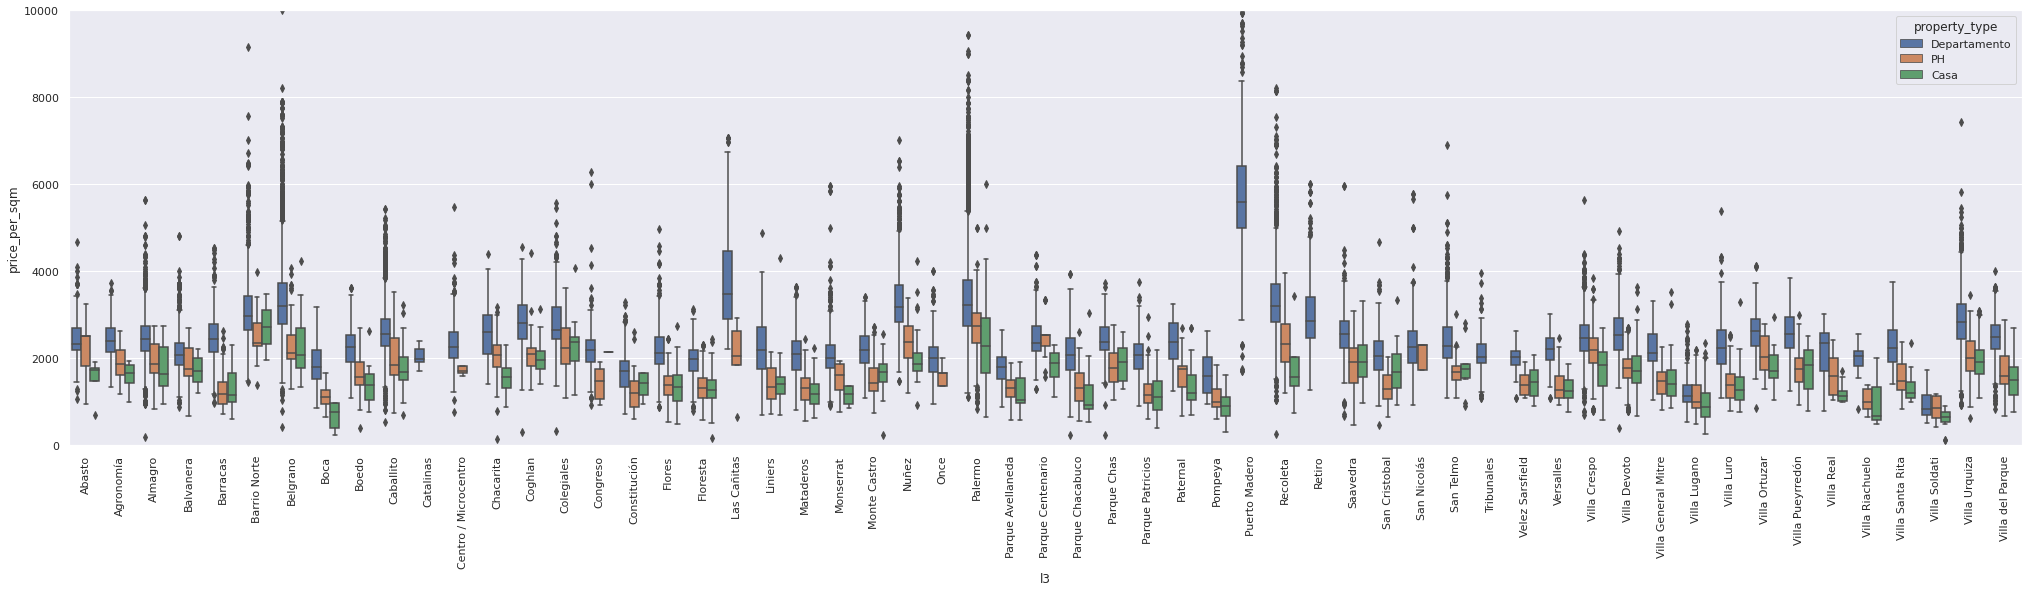

In [ ]:
# procedemos a graficar los boxplot de cada tipo de propiedad por el precio por m2.

grafica_precios_zona_capital_federal = sns.boxplot(data = properati_dataframe.sort_values("l3"), x = "l3" , y = "price_per_sqm", hue="property_type")
sns.set(rc={'figure.figsize':(35,8)}) # no se porque no funciono la formula .set_size_inches( 50, 30) si en las demas si funcionó.
plt.ylim(0, 10000)
plt.xticks(rotation = 90)
plt.show

#observamos que el rango de precio por m2 es muy alto, y tuvimos que poner un limite en el eje Y de 10.000
# asi que se hará una depuración de precios por propiedad. 

In [ ]:
# hayamos el cuartil 50% para saber la mediana de precios
print(properati_dataframe.groupby(['l3',"property_type"])['price_per_sqm'].quantile(.5))

#hayamos la mediana para corroborar que el cuartil 50% sen iguales
print(properati_dataframe.groupby(['l3',"property_type"])['price_per_sqm'].median())

# pudimos corroborar que la formula del cuartil 50% es correcta puesto que los valores son iguales a la mediana.



l3                property_type
Abasto            Casa             1721.674877
                  Departamento     2333.333333
                  PH               2500.000000
Agronomía         Casa             1666.666667
                  Departamento     2403.846154
                                      ...     
Villa Urquiza     Departamento     2829.268293
                  PH               2013.290357
Villa del Parque  Casa             1508.387446
                  Departamento     2488.888889
                  PH               1592.245989
Name: price_per_sqm, Length: 159, dtype: float64
l3                property_type
Abasto            Casa             1721.674877
                  Departamento     2333.333333
                  PH               2500.000000
Agronomía         Casa             1666.666667
                  Departamento     2403.846154
                                      ...     
Villa Urquiza     Departamento     2829.268293
                  PH               2013.2

In [ ]:
# identificamos el cuantil 25% y 75% de los price_per_sqm de los barrios para eliminar los precios muy bajos o muy altos
properati_dataframe_quantile_25 = pd.DataFrame(properati_dataframe.groupby(['l3',"property_type"])['price_per_sqm'].quantile(.25))
properati_dataframe_quantile_75 = pd.DataFrame(properati_dataframe.groupby(['l3',"property_type"])['price_per_sqm'].quantile(.75))
#estos cuadros sirvieron para corroborar que cuando creamos la columna cuantil, haya quedado bien la formula cruzando los datos


properati_dataframe_quantile_25


price_per_sqm
l3               property_type               
Abasto           Casa             1465.987340
                 Departamento     2180.000000
                 PH               1810.344828
Agronomía        Casa             1421.090634
                 Departamento     2146.551724
...                                       ...
Villa Urquiza    Departamento     2446.153846
                 PH               1714.712919
Villa del Parque Casa             1161.668313
                 Departamento     2208.542320
                 PH               1401.945347

[159 rows x 1 columns]

In [ ]:
properati_dataframe_quantile_75

price_per_sqm
l3               property_type               
Abasto           Casa             1771.580232
                 Departamento     2689.291101
                 PH               2500.000000
Agronomía        Casa             1853.582555
                 Departamento     2689.655172
...                                       ...
Villa Urquiza    Departamento     3253.490151
                 PH               2387.901139
Villa del Parque Casa             1804.081633
                 Departamento     2753.382252
                 PH               2041.095890

[159 rows x 1 columns]

In [ ]:
# tambien creamos la columna quantiles_surface_covered
properati_dataframe['quantiles_surface_covered'] = properati_dataframe.groupby(['l3',"property_type"])['surface_covered'].transform(lambda x: pd.qcut(x, 4,labels=False, duplicates="drop"))

# vamos a remover los valores NULL 
properati_dataframe.dropna(inplace = True)
properati_dataframe.count(axis = "index")


start_date                   68403
end_date                     68403
created_on                   68403
lat                          68403
lon                          68403
l1                           68403
l2                           68403
l3                           68403
rooms                        68403
bedrooms                     68403
bathrooms                    68403
surface_total                68403
surface_covered              68403
price                        68403
currency                     68403
title                        68403
description                  68403
property_type                68403
operation_type               68403
check_surface_total          68403
price_per_sqm                68403
surface_efficiency           68403
dorm_bath                    68403
quantiles_surface_covered    68403
dtype: int64

In [ ]:

#y tambien creados la columna de quantiles_surface_efficiency para luego observar si hay alguna correlacion entre precio y eficiencia por inmueble
properati_dataframe['quantiles_surface_efficiency'] = properati_dataframe.groupby(['l3',"property_type","dorm_bath"])['surface_efficiency'].transform(lambda x: pd.qcut(x, 4,labels=False, duplicates="drop"))

# vamos a remover los valores NULL 
properati_dataframe.dropna(inplace = True)
properati_dataframe.count(axis = "index")


start_date                      67282
end_date                        67282
created_on                      67282
lat                             67282
lon                             67282
l1                              67282
l2                              67282
l3                              67282
rooms                           67282
bedrooms                        67282
bathrooms                       67282
surface_total                   67282
surface_covered                 67282
price                           67282
currency                        67282
title                           67282
description                     67282
property_type                   67282
operation_type                  67282
check_surface_total             67282
price_per_sqm                   67282
surface_efficiency              67282
dorm_bath                       67282
quantiles_surface_covered       67282
quantiles_surface_efficiency    67282
dtype: int64

In [ ]:
# creamos una columna llamada days_on_sale para determinar la cantidad de dias en que una propiedad estuvo en oferta en la pagina web
# con el fin de analizar mas adelante si hay relación entre el precio y los días en que estuvo a la venta

# primero, debemos volver los valores de las columnas created_on y ENDDATE, fechas

properati_dataframe['created_on'] = pd.to_datetime(properati_dataframe['created_on'], errors = 'coerce')
properati_dataframe['end_date'] = pd.to_datetime(properati_dataframe['end_date'] ,errors = 'coerce') # errors = 'coerce' fue usado ya que al parecer habian fechas que se salian del rango que cepta python. Esos valores se vuelven Nat. La idea no es borrar esos datos sino mas bien reemplazarlos con una fecha

print(properati_dataframe.dtypes)
print(properati_dataframe.count(axis = "index")) #aca vemos que en la columna END_DATE faltan dato ya que tienen valores Nat




start_date                              object
end_date                        datetime64[ns]
created_on                      datetime64[ns]
lat                                    float64
lon                                    float64
l1                                      object
l2                                      object
l3                                      object
rooms                                  float64
bedrooms                               float64
bathrooms                              float64
surface_total                          float64
surface_covered                        float64
price                                  float64
currency                                object
title                                   object
description                             object
property_type                           object
operation_type                          object
check_surface_total                    float64
price_per_sqm                          float64
surface_effic

In [ ]:
# segundo, vamos a reemplazar esos Nat values de la columna end_date en alguna fecha que yo establezca

#primero voy a ver cual es el valor maximo de la columna end_date. se puede ver que es 2020-03-25

print(properati_dataframe.max())

#vamos a crear la fecha

dummie_end_date = pd.to_datetime('2020-03-25')

properati_dataframe['end_date'] = properati_dataframe['end_date'].fillna(dummie_end_date)

#corroboramos

print(properati_dataframe.dtypes)
print(properati_dataframe.count(axis = "index")) 



start_date                                                             2020-01-25
end_date                                                      2020-03-25 00:00:00
created_on                                                    2020-01-25 00:00:00
lat                                                                      -34.5359
lon                                                                      -58.3539
l1                                                                      Argentina
l2                                                                Capital Federal
l3                                                               Villa del Parque
rooms                                                                          21
bedrooms                                                                        9
bathrooms                                                                       5
surface_total                                                                 494
surface_covered 

In [ ]:
# tercero ahora si vamos a crear la columna days_on_sale con la resta de las fechas, para saber cuanto duraron las propiedades en oferta

properati_dataframe["days_on_sale"] = (properati_dataframe["end_date"] - properati_dataframe["created_on"]).dt.days #.dt.days es para eliminar la palabra DAYS que se adhiere a la resta, lo que hace que no sea un numero sino una fecha
print(properati_dataframe.min()) #verificamos que no hayan negativos 
print(properati_dataframe.dtypes)


start_date                                                             2019-01-01
end_date                                                      2019-01-04 00:00:00
created_on                                                    2019-01-01 00:00:00
lat                                                                      -34.6964
lon                                                                      -58.5305
l1                                                                      Argentina
l2                                                                Capital Federal
l3                                                                         Abasto
rooms                                                                           1
bedrooms                                                                        0
bathrooms                                                                       1
surface_total                                                                  21
surface_covered 

In [ ]:
# creamos una columna que indique el año en que se publico el inmueble

properati_dataframe['year_created'], properati_dataframe['month_created'] = properati_dataframe['created_on'].dt.year, properati_dataframe['created_on'].dt.month
properati_dataframe.dtypes




start_date                              object
end_date                        datetime64[ns]
created_on                      datetime64[ns]
lat                                    float64
lon                                    float64
l1                                      object
l2                                      object
l3                                      object
rooms                                  float64
bedrooms                               float64
bathrooms                              float64
surface_total                          float64
surface_covered                        float64
price                                  float64
currency                                object
title                                   object
description                             object
property_type                           object
operation_type                          object
check_surface_total                    float64
price_per_sqm                          float64
surface_effic

In [ ]:
#creamos columna de quantiles para el precio por m2

properati_dataframe['quantiles'] = properati_dataframe.groupby(['l3',"property_type","quantiles_surface_covered"])['price_per_sqm'].transform(lambda x: pd.qcut(x, 4,labels=False, duplicates="drop"))

# vamos a remover los valores NULL 
properati_dataframe.dropna(inplace = True)
properati_dataframe.count(axis = "index")


start_date                      67241
end_date                        67241
created_on                      67241
lat                             67241
lon                             67241
l1                              67241
l2                              67241
l3                              67241
rooms                           67241
bedrooms                        67241
bathrooms                       67241
surface_total                   67241
surface_covered                 67241
price                           67241
currency                        67241
title                           67241
description                     67241
property_type                   67241
operation_type                  67241
check_surface_total             67241
price_per_sqm                   67241
surface_efficiency              67241
dorm_bath                       67241
quantiles_surface_covered       67241
quantiles_surface_efficiency    67241
days_on_sale                    67241
year_created

In [ ]:
#eliminamos los cuantiles 25% y 75% puesto que son precios muy altos o muy bajos.

nombre_filtros_quantiles = properati_dataframe[(properati_dataframe["quantiles"] == 0)].index
properati_dataframe.drop(nombre_filtros_quantiles, inplace = True) 

nombre_filtros_quantiles = properati_dataframe[(properati_dataframe["quantiles"] == 3)].index
properati_dataframe.drop(nombre_filtros_quantiles, inplace = True) 

In [ ]:
properati_dataframe

start_date   end_date  ... month_created  quantiles
11      2019-10-17 2019-10-26  ...            10        1.0
12      2019-10-17 2019-12-19  ...            10        2.0
20      2019-10-17 2019-10-24  ...            10        2.0
22      2019-10-17 2019-11-13  ...            10        2.0
23      2019-10-17 2019-12-23  ...            10        2.0
...            ...        ...  ...           ...        ...
146539  2019-07-31 2019-08-14  ...             7        1.0
146541  2019-07-31 2019-08-13  ...             7        2.0
146544  2019-07-31 2019-08-13  ...             7        2.0
146552  2019-07-31 2019-09-04  ...             7        2.0
146557  2019-07-31 2019-08-23  ...             7        1.0

[33408 rows x 29 columns]

<function matplotlib.pyplot.show>

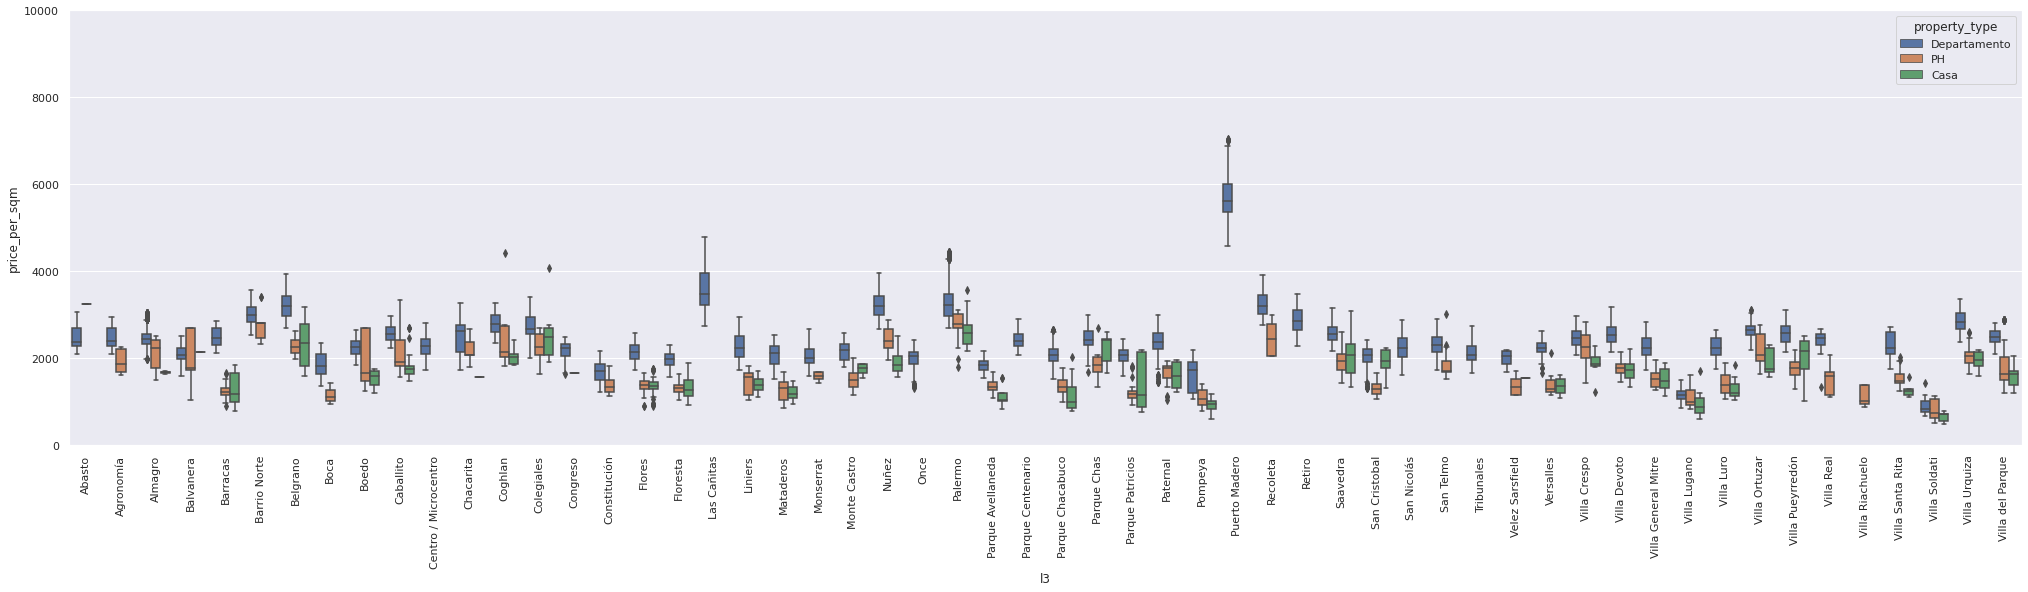

In [ ]:
#graficamos otra vez para saber como quedaron los rangos de precios depurados por tipo de propiedad y por barrio

grafica_precios_zona_capital_federal = sns.boxplot(data = properati_dataframe.sort_values("l3"), x = "l3" , y = "price_per_sqm", hue="property_type", dodge=True)
sns.set(rc={'figure.figsize':(35,8)}) # no se porque no funciono la formula .set_size_inches( 50, 30) si en las demas si funcionó.
plt.ylim(0, 10000)
plt.xticks(rotation = 90)
plt.show


<function matplotlib.pyplot.show>

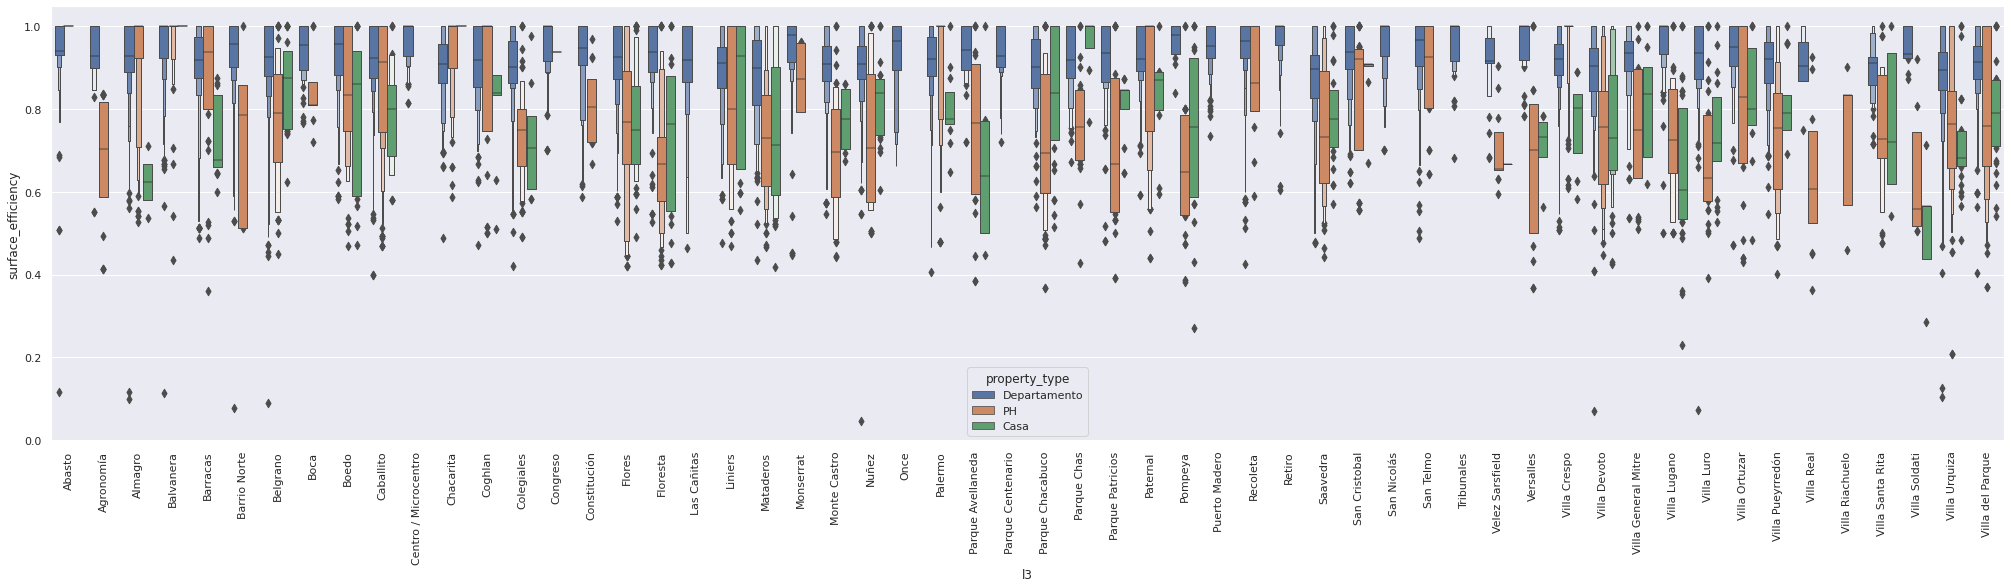

In [ ]:
#graficamos las eficiencias por inmueble por barrio
sns.boxenplot(x = "l3" , y = "surface_efficiency",data=properati_dataframe.sort_values("l3"),hue="property_type")
plt.xticks(rotation = 90)
plt.show


In [ ]:
# resumimos el numero de datos por propiedad

resumen_propiedades = properati_dataframe.value_counts("property_type",ascending=False).rename_axis("property_type").reset_index(name="counts")
resumen_propiedades

property_type  counts
0  Departamento   29902
1            PH    2859
2          Casa     647

In [ ]:
# graficamos el pairplot

#sns.pairplot(properati_dataframe[properati_dataframe['property_type']=="PH"], hue="quantiles_surface_efficiency")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

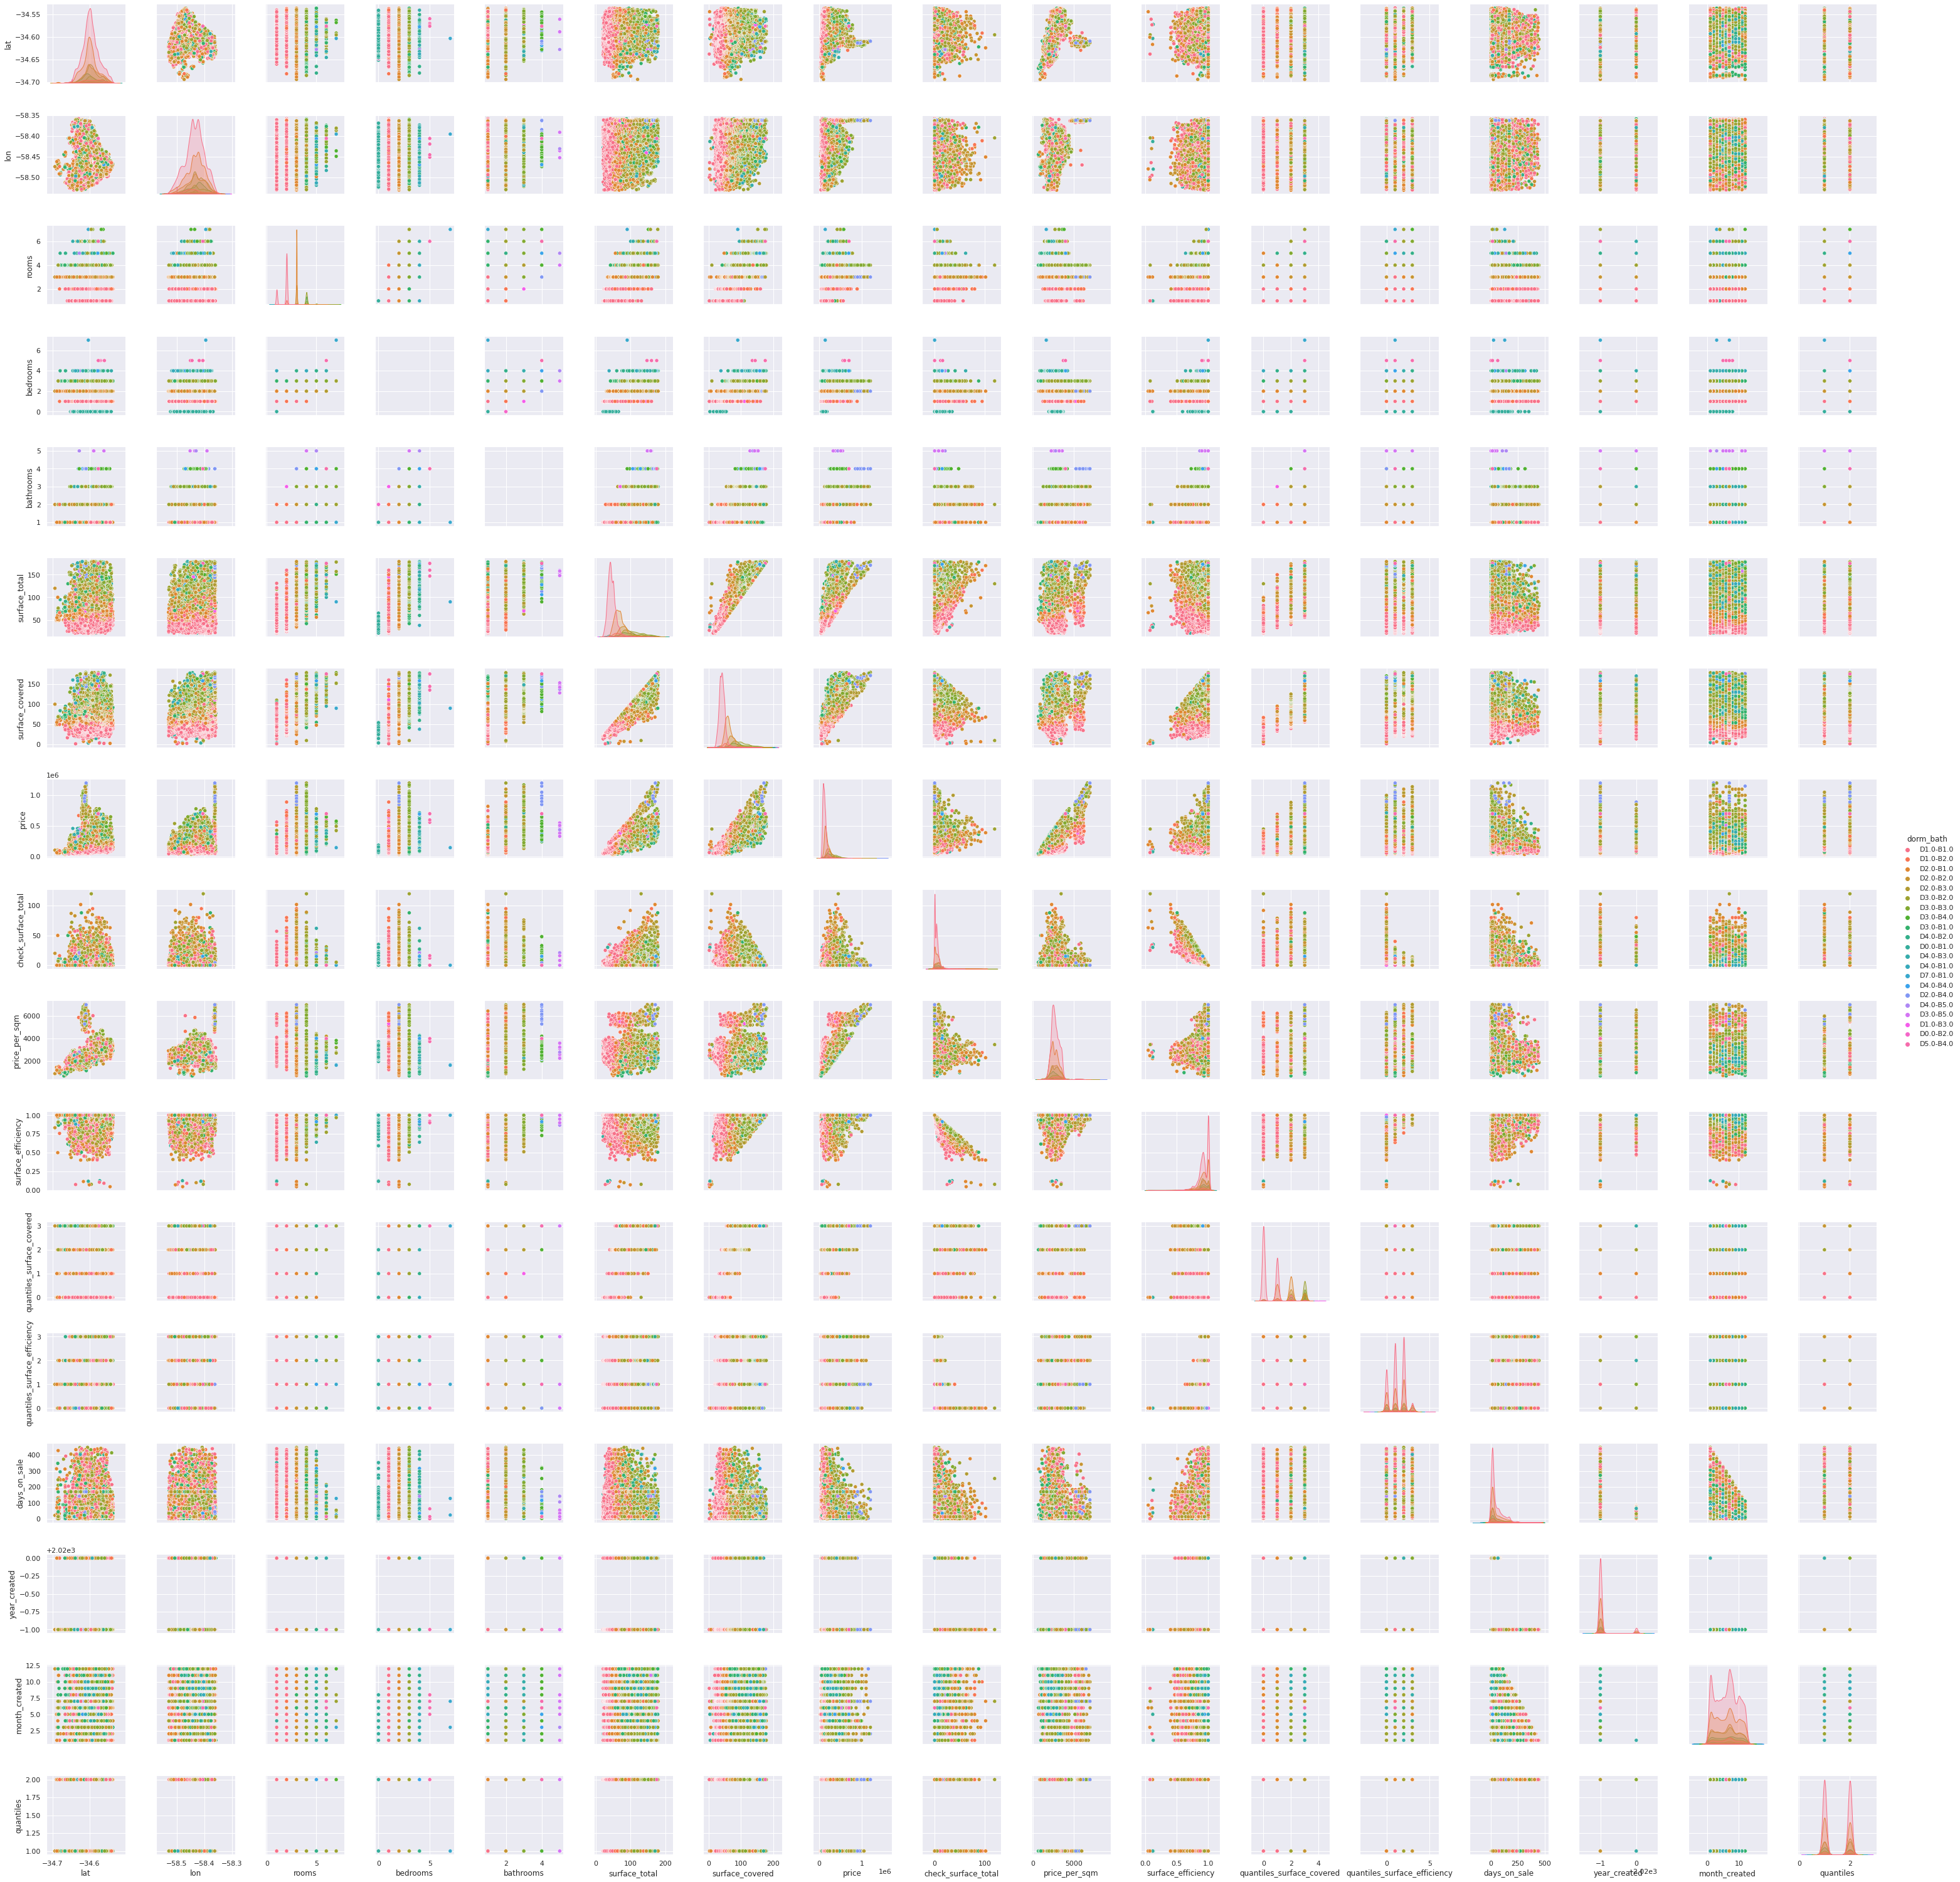

In [ ]:
#graficamos el pairplot solo para el tipo de propiedad DEPARTAMENTO ya que es el que tiene mas datos

sns.pairplot(properati_dataframe[properati_dataframe['property_type']=="Departamento"], hue="dorm_bath")


7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

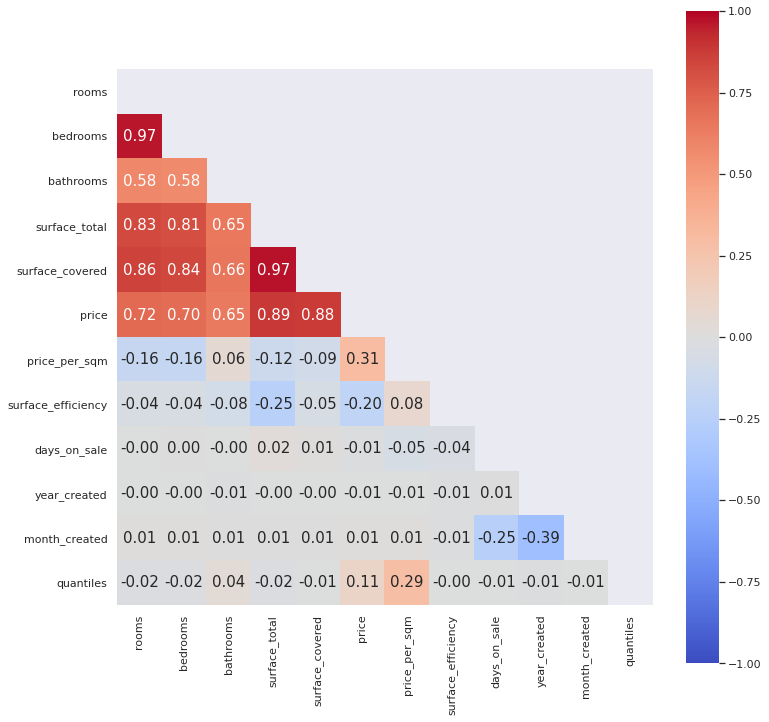

In [ ]:
# Mapa de colleralaciones y heatmap



grafica_correlacion = properati_dataframe.drop(columns = ["start_date",	"end_date", "created_on",	"lat",	"lon", "l1",	"l2",	"l3", 
                                                            "currency",	"title",	"description", "property_type",	"operation_type",	
                                                            "check_surface_total","quantiles_surface_efficiency",
                                                          "quantiles_surface_covered","dorm_bath"]).corr(method="spearman")
plt.figure(figsize=(12,12))
matrix = np.triu(grafica_correlacion) #para hacer que la matriz de correlacion tenga la forma de un triangulo, dentro de la funcion de HEATMAP esta el argumento: mask=matrix
sns.heatmap(grafica_correlacion, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= properati_dataframe.drop(columns = ["start_date",	"end_date", "created_on",	"lat",	"lon", "l1",	"l2",	"l3", 
                                                            "currency",	"title",	"description",	"property_type",	"operation_type",	
                                                            "check_surface_total","quantiles_surface_efficiency",
                                                            "quantiles_surface_covered","dorm_bath"]).columns, 
           yticklabels= properati_dataframe.drop(columns =  ["start_date",	"end_date", "created_on",	"lat",	"lon", "l1",	"l2",	"l3", 
                                                            "currency",	"title",	"description",	"property_type",	"operation_type",	
                                                            "check_surface_total","quantiles_surface_efficiency",
                                                             "quantiles_surface_covered","dorm_bath"]).columns,
           cmap= 'coolwarm',vmin=-1, vmax=1,center=0,mask=matrix)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()


In [ ]:
# Mapa de colleralaciones y heatmap por tipo de propiedad 

grafica_correlacion_departamentos = properati_dataframe.drop(columns = ["start_date",	"end_date", "created_on",	"lat",	"lon", "l1",	"l2", "l3",
                                                            "currency",	"title",	"description",	"operation_type",	
                                                            "check_surface_total",	"quantiles","quantiles_surface_efficiency",
                                                            "quantiles_surface_covered"]).groupby("property_type").corr(method="spearman")

grafica_correlacion_departamentos

rooms  ...  month_created
property_type                               ...               
Casa          rooms               1.000000  ...       0.072308
              bedrooms            0.762617  ...       0.025273
              bathrooms           0.431832  ...       0.034627
              surface_total       0.461571  ...       0.070253
              surface_covered     0.556276  ...       0.081411
              price               0.431181  ...       0.105094
              price_per_sqm       0.002764  ...       0.020621
              surface_efficiency  0.185089  ...      -0.012590
              days_on_sale       -0.037900  ...      -0.172473
              year_created        0.013941  ...      -0.462266
              month_created       0.072308  ...       1.000000
Departamento  rooms               1.000000  ...       0.018187
              bedrooms            0.961649  ...       0.013496
              bathrooms           0.566041  ...       0.004026
              surface_total       0.825228  ...       0.010695
              surface_covered     0.850231  ...       0.010784
              price               0.708502  ...       0.014420
              price_per_sqm      -0.050252  ...       0.008596
              surface_efficiency -0.010102  ...      -0.014498
              days_on_sale       -0.013357  ...      -0.253160
              year_created       -0.006616  ...      -0.392988
              month_created       0.018187  ...       1.000000
PH            rooms               1.000000  ...      -0.015922
              bedrooms            0.908349  ...      -0.027373
              bathrooms           0.451821  ...       0.030513
              surface_total       0.524254  ...      -0.051385
              surface_covered     0.638469  ...      -0.026043
              price               0.500296  ...      -0.009589
              price_per_sqm       0.054535  ...       0.043983
              surface_efficiency  0.246575  ...       0.026630
              days_on_sale       -0.111090  ...      -0.255990
              year_created        0.027083  ...      -0.396420
              month_created      -0.015922  ...       1.000000

[33 rows x 11 columns]

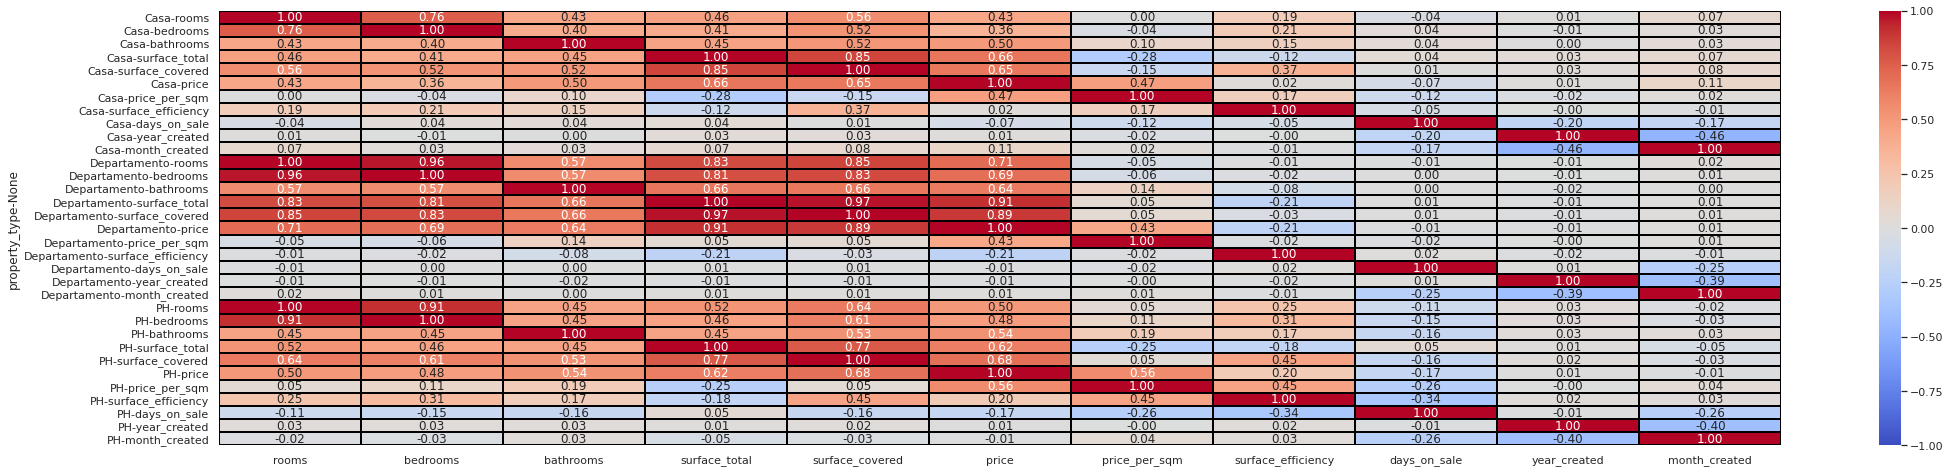

<Figure size 864x864 with 0 Axes>

In [ ]:
sns.heatmap(grafica_correlacion_departamentos, cbar = True, annot=True, fmt= '.2f',
           cmap= 'coolwarm',vmin=-1, vmax=1,center=0,linewidths=1,linecolor='black')
plt.figure(figsize=(12,12))
plt.show()

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


In [ ]:
# de acuerdo con las graficas de correlaciones por propiedad, por precio m2, por eficiencia area cubierta/area total,
# no mostraron correlaciones relevantes que permita hacerse preguntas más profundas o detalladas
# por esa razón se usara una mascara para analizar la información descrita por barrio, con el fin de tener mejores análisis

In [ ]:
#empezamos analizamos los Departamentos
resumen_propiedades_barrios = properati_dataframe[properati_dataframe["property_type"]=="Departamento"].value_counts("l3",ascending=False)
print(resumen_propiedades_barrios.head(10))
print(resumen_propiedades_barrios.sum())


l3
Palermo          4546
Almagro          2867
Villa Crespo     2428
Belgrano         2275
Caballito        2221
Recoleta         1934
Barrio Norte     1161
Villa Urquiza    1140
Balvanera         907
Nuñez             738
dtype: int64
29902


(33408, 29)
(4546, 27)


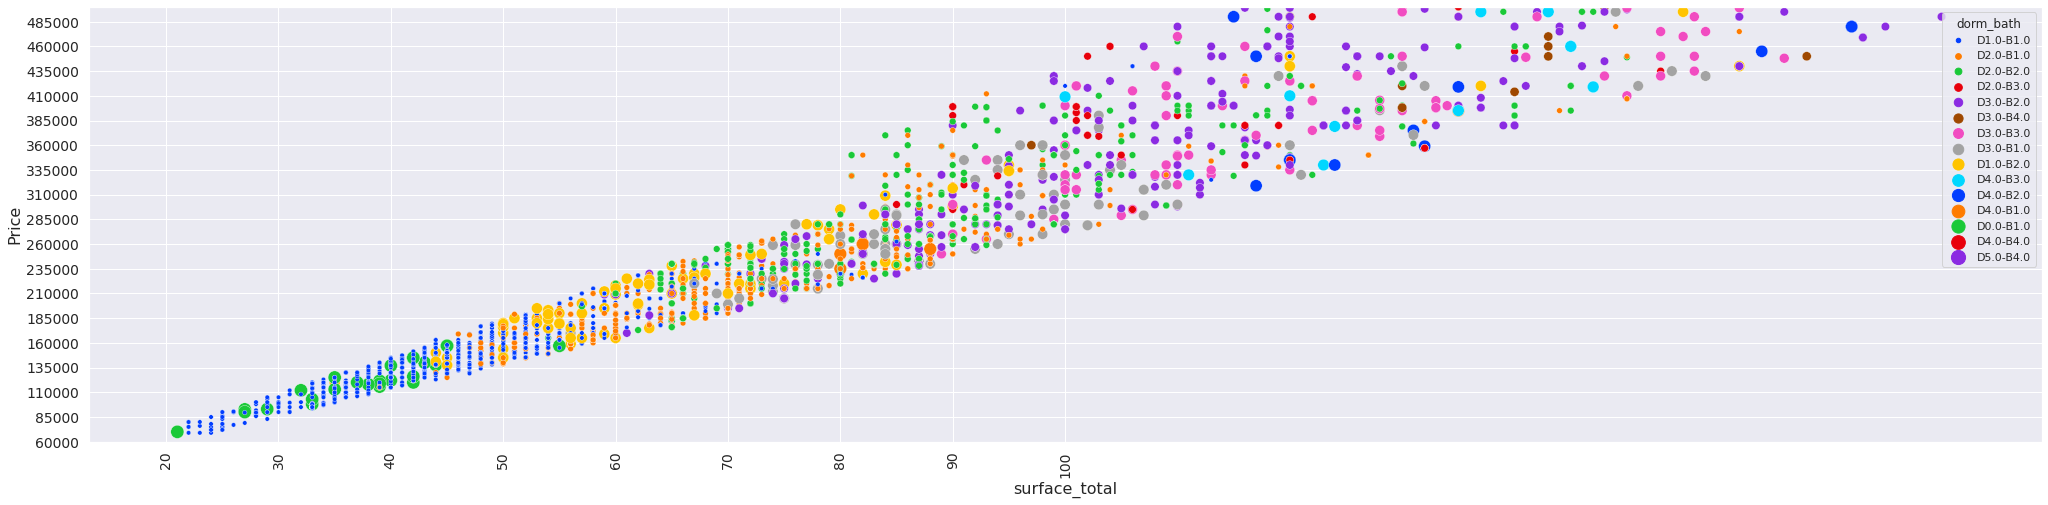

In [ ]:
# debido a que el barrio palermo es el que más datos tiene, vamos a empezar analizar solo este barrio
# aplicamos mascara y quitamos columnas innecesarias para que no salgan en el pairplot
mascara = properati_dataframe.drop(columns=["rooms","check_surface_total"])
mascara_2 = mascara[(mascara.l3 == "Palermo") & (mascara.property_type == "Departamento" ) ]

print(properati_dataframe.shape) #obsrvamos que con la mascara no se dañaron las cantidad de filas de properati_dataframe
print(mascara_2.shape) #observamos que la cantidad de propidades DEPARTAMENTO es igual al shape de la MASCARA
#print(mascara_2.groupby("quantiles_surface_covered").mean())
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

sns.scatterplot(x = "surface_total", y = "price", data=mascara_2, hue = "dorm_bath",
                size="dorm_bath",sizes=(200, 20), legend="full",palette="bright")
plt.xticks(rotation = 90)
plt.yticks(np.arange(60000, 600000, step=25000))
plt.xticks(np.arange(20, 110, step=10))
plt.ylabel('Price', fontsize=16) 
plt.xlabel('surface_total', fontsize=16) 
plt.tick_params(labelsize=14)
plt.ylim(60000, 500000)
plt.show()

# Gracias a esta grafica observamos que hay una relación directa entre el tipo de apartamento (Dormroom/Bathrooms), el tamaño del apartamento,
# y el precio del apartamento; en el barrio de PALERMO.
# Lo primero que se observa es que los departamentos en el barrio palermo, están conformados principalmente por departamentos 
# de 1 dormitorio y 1 baño,  en áras cubiertas de 20m2 a 45m2, cuyos precios oscilan entre USD60.000 y USD200.000
# De esta manera, se corrobora que a medida que los DEPARTAMENTOS son más grandes, tienden a tener mas baños y dormitorios,
# asi como tienden a aumentar su precio (como es de esperarse: a mayor tamaño, mayor precio).
# Sin embargo, se analizó el precio/m2 ya que es muy raro que los DEPARTAMENTOS con mismo tamaño y mismo tipo Dorm/bath,
# tuvieran un rango de precios tan amplio.



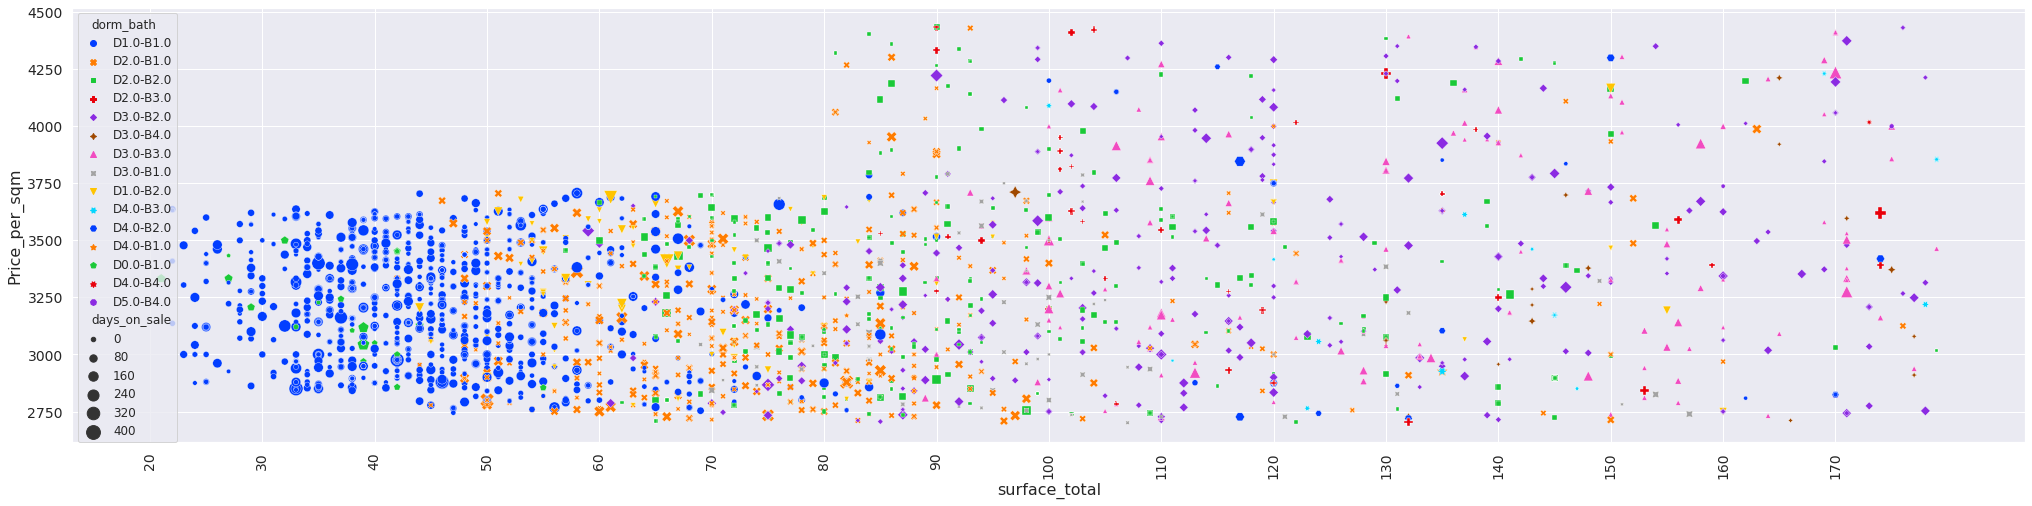

In [ ]:
sns.scatterplot(x = "surface_total", y = "price_per_sqm", data=mascara_2, hue = "dorm_bath",
                size="days_on_sale",sizes=(20, 200), palette="bright",style="dorm_bath")
plt.xticks(rotation = 90)
plt.xticks(np.arange(20,180, step=10))
plt.ylabel('Price_per_sqm', fontsize=16) 
plt.xlabel('surface_total', fontsize=16) 
plt.tick_params(labelsize=14)
sns.color_palette("Set1")
plt.show()

# al analizar la grafica de precio/m2 vs tamaño de los departamentos, se validó la duda del punto anterior.
# Se puede observar que, por ejemplo, las unidades de 30m2, cuestan USD3.000/m2 y USD3.500/m2 lo cual es muy raro
# ya que todas las unidades en este rango de precios, tienen 1 dormitorio y 1 baño.
# de esta manera, la hipotesis es que dentro del barrio PALERMO, hay varios tipos de estratos socio económicos.

(4517, 27)


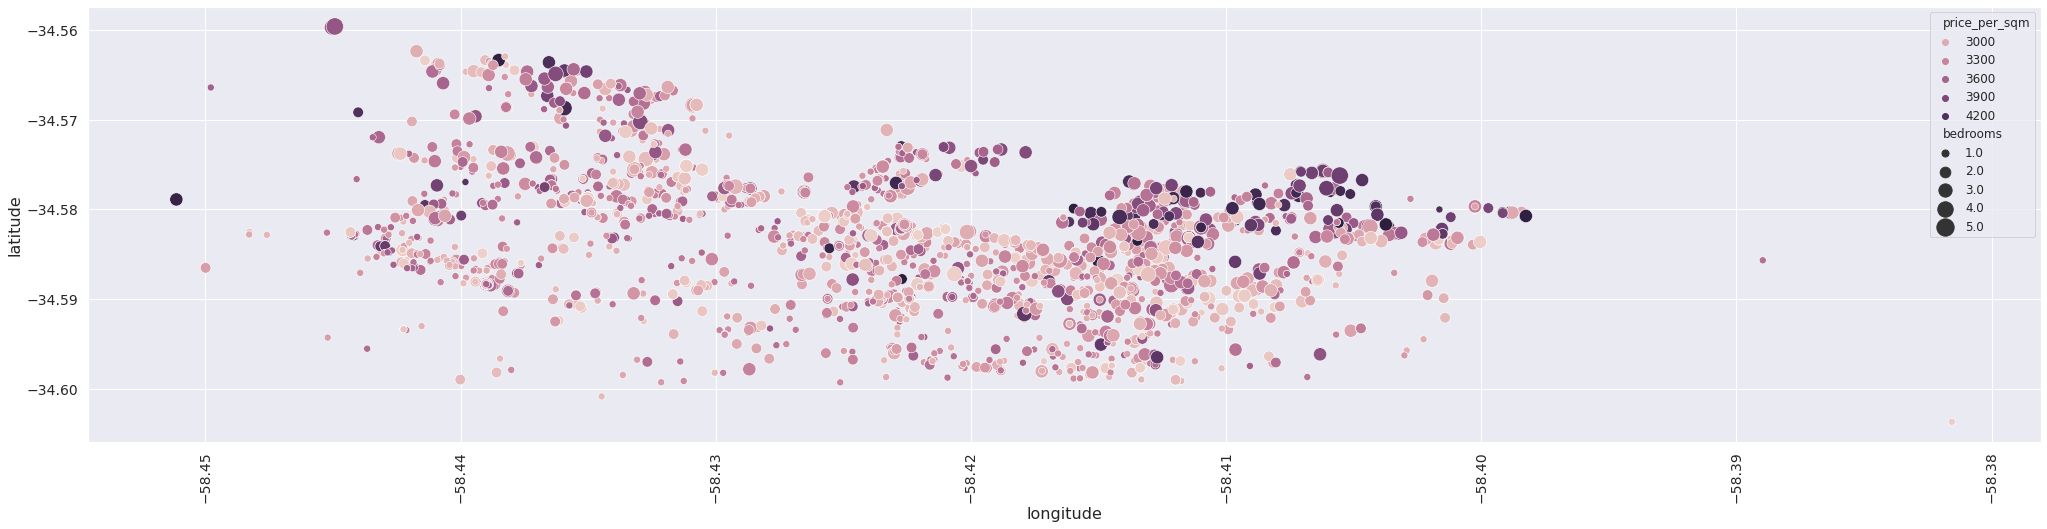

In [ ]:
# a continuación vamos a validar o desechar la hipotesis de que en el barrio PALERMO, hay propiedades de diferentes estratos
# socio economicos.
# para ello, usaremos las columnas de latitud y longitud,


# Conclusion: Al parecer los extremos nor-occidente y nor-oriente parecen tener los precios/m2 mas altos.

mascara_4 = mascara[(mascara.l3 == "Palermo") & (mascara.property_type == "Departamento" ) & (mascara.bedrooms >= 1 )&
                    (mascara.bathrooms >= 1 )]

print(mascara_4.shape)


#graficamos mascara_4

sns.scatterplot(x = "lon", y = "lat", data=mascara_4, hue="price_per_sqm",size="bedrooms",sizes=(50, 300))
plt.xticks(rotation = 90)
#plt.xticks(np.arange(20, 110, step=10))
plt.ylabel('latitude', fontsize=16) 
plt.xlabel('longitude', fontsize=16) 
plt.tick_params(labelsize=14)
#sns.color_palette("Set1")
plt.show()




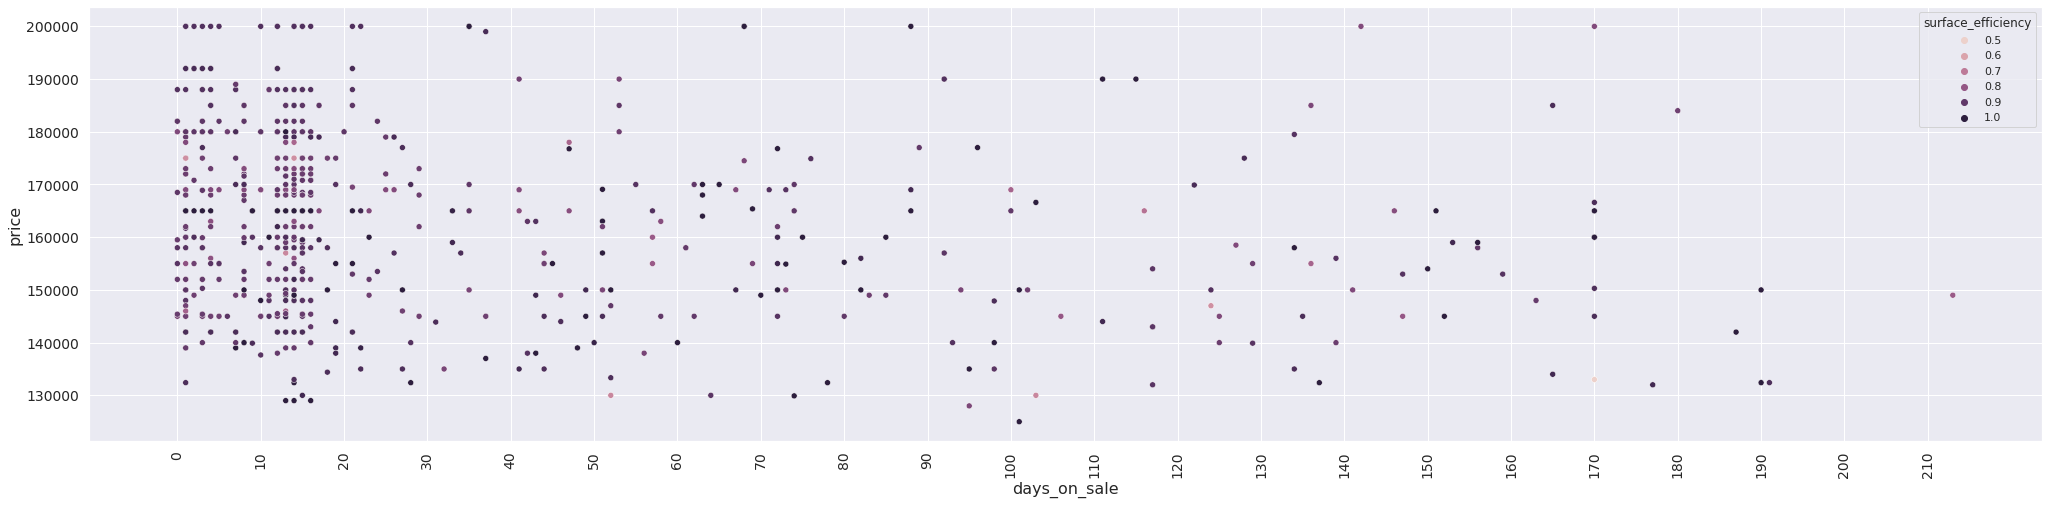

In [ ]:
# Se evalua otra hipotesis: tiempo en oferta
# usando los días en que la propiedad estuvo ofertandose en la plataforma, vamos a ver si hay alguna explicación 
# para que las unidades que miden la misma cantidad de m2, tengan diferentes precios, siendo que todas tienen 
# 1 dormitorio, 1 baño, son departamentos y están en PALERMO.

# en la grafica se puede ver que no hay una correlacion directa entre los días en que se ofertó el inmueble, y el precio. 
# lo que si podemos ver es que la mayoria de inmuebles duran 20 dias en la plataforma.


mascara_5 = mascara[(mascara.l3 == "Palermo") & (mascara.property_type == "Departamento" ) & 
                    (mascara.surface_total >= 45) & (mascara.dorm_bath == "D1.0-B1.0") &
                    (mascara.surface_total <= 55) &(mascara.year_created <= 2019) & (mascara.days_on_sale <= 220) ]

sns.scatterplot(x = "days_on_sale", y = "price", data=mascara_5 , hue="surface_efficiency" )
plt.xticks(rotation = 90)
plt.xticks(np.arange(0, 220, step=10))
plt.ylabel('price', fontsize=16) 
plt.xlabel('days_on_sale', fontsize=16) 
plt.tick_params(labelsize=14)
plt.show()


(29700, 27)


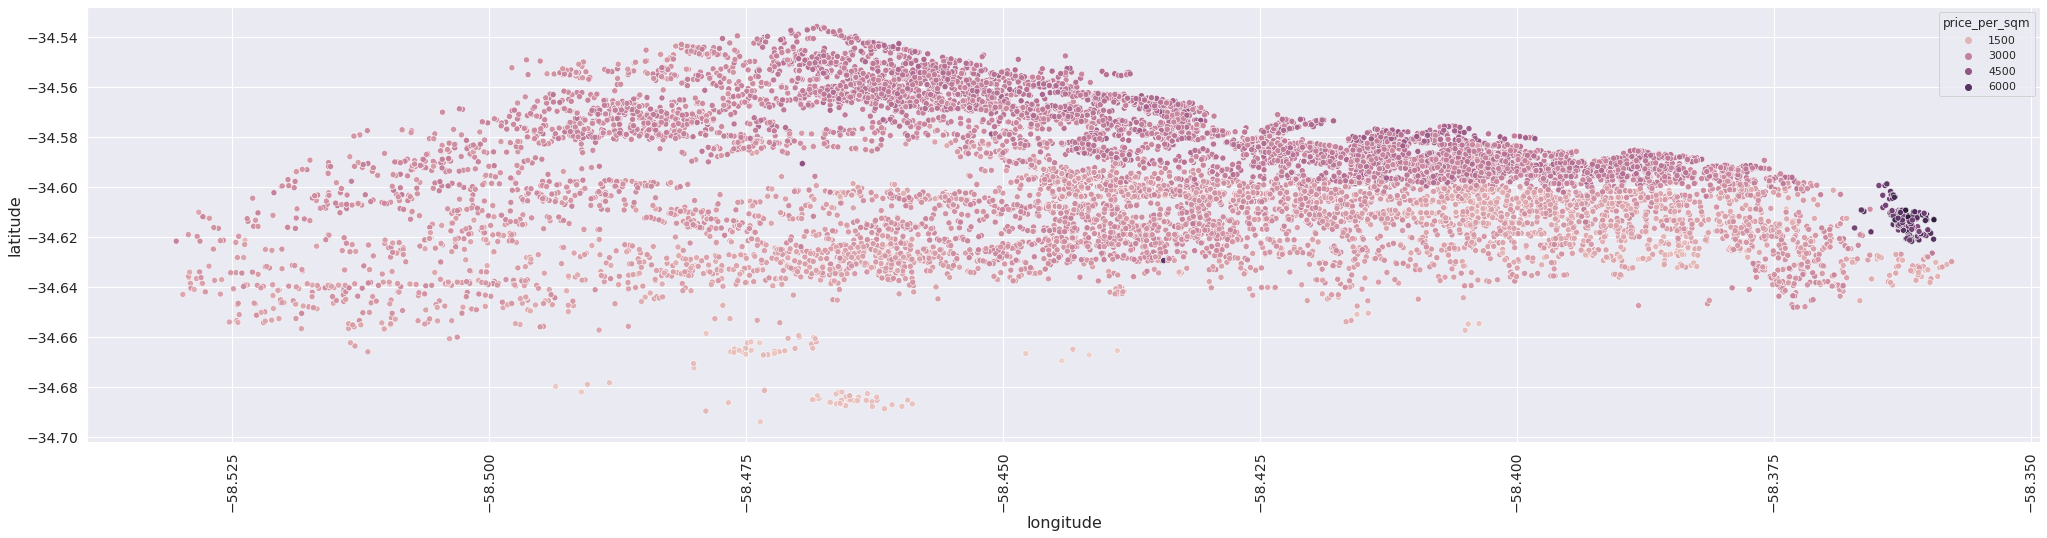

In [ ]:
mascara_6 = mascara[(mascara.property_type == "Departamento" ) & (mascara.bedrooms >= 1 )&
                    (mascara.bathrooms >= 1 )]

print(mascara_6.shape)


#graficamos mascara_4

sns.scatterplot(x = "lon", y = "lat", data=mascara_6, hue="price_per_sqm")
plt.xticks(rotation = 90)
#plt.xticks(np.arange(20, 110, step=10))
plt.ylabel('latitude', fontsize=16) 
plt.xlabel('longitude', fontsize=16) 
plt.tick_params(labelsize=14)
#sns.color_palette("Set1")
plt.show()


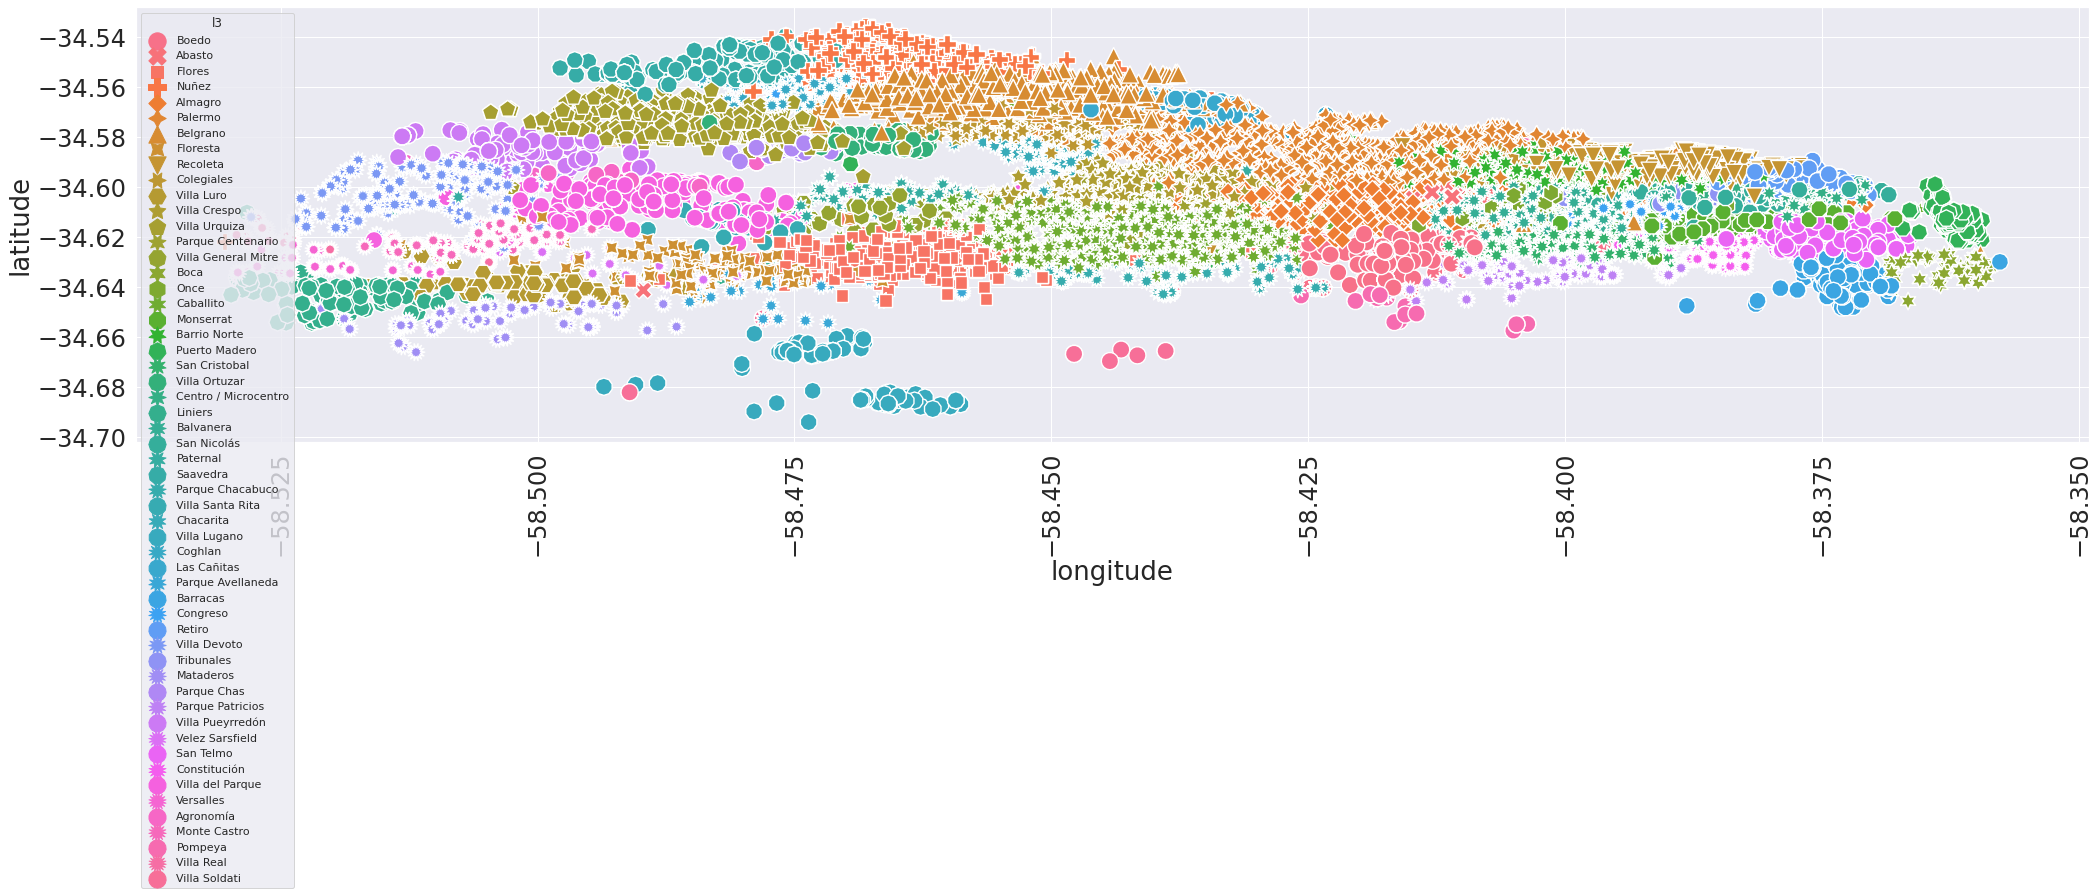

In [ ]:
#Podemos observar que puerto madero es el barrio mas caro en termino de precio/m2 de los inmuebles tipo DEPARTAMENTO.

sns.scatterplot(x = "lon", y = "lat", data=mascara_6, hue="l3",style="l3",size="l3",sizes=(300, 300))
plt.xticks(rotation = 90)
plt.ylabel('latitude', fontsize=26) 
plt.xlabel('longitude', fontsize=26) 
plt.tick_params(labelsize=24)
#sns.set(rc={'figure.figsize':(75,35)})
plt.show()

In [ ]:
# resumen de la cantidad de tipos de apartamento
resumen_propiedades_tipospropiedad = properati_dataframe[(properati_dataframe["property_type"]=="Departamento") & 
                                                         (properati_dataframe["l3"]=="Palermo")].groupby("l3")["dorm_bath"].value_counts(ascending=False)
display(resumen_propiedades_tipospropiedad.head(100))
print(resumen_propiedades_tipospropiedad.sum())
print(resumen_propiedades_tipospropiedad.shape)




l3       dorm_bath
Palermo  D1.0-B1.0    2005
         D2.0-B1.0     936
         D2.0-B2.0     520
         D3.0-B2.0     467
         D3.0-B3.0     170
         D3.0-B1.0     149
         D1.0-B2.0     119
         D2.0-B3.0      72
         D0.0-B1.0      29
         D3.0-B4.0      28
         D4.0-B2.0      19
         D4.0-B3.0      18
         D4.0-B1.0       8
         D4.0-B4.0       3
         D5.0-B4.0       3
Name: dorm_bath, dtype: int64

4546
(15,)


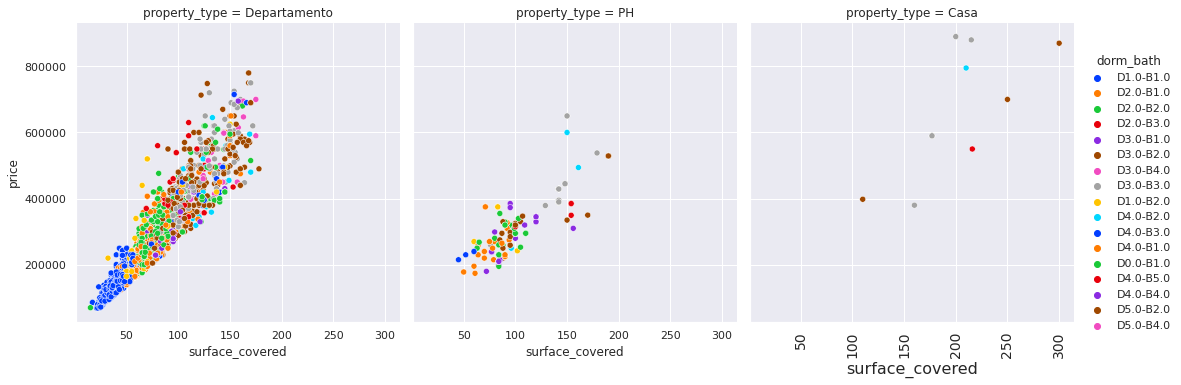

In [ ]:
mascara_3 = mascara[(mascara.l3 == "Palermo")]

sns.relplot(data=mascara_3, x = "surface_covered", y = "price", col="property_type", hue="dorm_bath",kind="scatter",palette="bright")
plt.xticks(rotation = 90)
#plt.yticks(np.arange(60000, 1400000, step=25000))
#plt.xticks(np.arange(20, 110, step=10))
plt.ylabel('Price', fontsize=16) 
plt.xlabel('surface_covered', fontsize=16) 
plt.tick_params(labelsize=14)
#plt.ylim(60000, 400000)
#plt.xlim(20, 100)
sns.color_palette("Set1")
plt.show()


### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [ ]:
# hacemos data frame nuevo
properati_nuevo_df = pd.DataFrame(properati)
properati_nuevo_df.head(3)

start_date    end_date  ... property_type  operation_type
0  2019-10-17  2019-12-23  ...  Departamento           Venta
1  2019-10-17  2019-11-21  ...            PH           Venta
2  2019-10-17  2019-11-01  ...            PH           Venta

[3 rows x 19 columns]

In [ ]:
# dejamos las propiedades solo de departamento, casa y PH

nombre_filtros = properati_nuevo_df[ (properati_nuevo_df["property_type"] == "Oficina")].index
properati_nuevo_df.drop(nombre_filtros, inplace = True) 


nombre_filtros = properati_nuevo_df[ (properati_nuevo_df["property_type"] == "Lote")].index
properati_nuevo_df.drop(nombre_filtros, inplace = True) 

nombre_filtros = properati_nuevo_df[ (properati_nuevo_df["property_type"] == "Otro")].index
properati_nuevo_df.drop(nombre_filtros, inplace = True) 

nombre_filtros = properati_nuevo_df[ (properati_nuevo_df["property_type"] == "Local comercial")].index
properati_nuevo_df.drop(nombre_filtros, inplace = True) 

nombre_filtros = properati_nuevo_df[ (properati_nuevo_df["property_type"] == "Casa de campo")].index
properati_nuevo_df.drop(nombre_filtros, inplace = True) 

nombre_filtros = properati_nuevo_df[ (properati_nuevo_df["property_type"] == "Depósito")].index
properati_nuevo_df.drop(nombre_filtros, inplace = True) 

nombre_filtros = properati_nuevo_df[ (properati_nuevo_df["property_type"] == "Cochera")].index
properati_nuevo_df.drop(nombre_filtros, inplace = True) 

properati_nuevo_df.shape

(143145, 19)

In [ ]:
# dejamos solo las propiedades de capital federal
nombre_filtros = properati_nuevo_df[ (properati_nuevo_df["l2"] == "Bs.As. G.B.A. Zona Norte")].index
properati_nuevo_df.drop(nombre_filtros, inplace = True) 

nombre_filtros = properati_nuevo_df[ (properati_nuevo_df["l2"] == "Bs.As. G.B.A. Zona Sur")].index
properati_nuevo_df.drop(nombre_filtros, inplace = True) 

nombre_filtros = properati_nuevo_df[ (properati_nuevo_df["l2"] == "Bs.As. G.B.A. Zona Oeste")].index
properati_nuevo_df.drop(nombre_filtros, inplace = True) 

properati_nuevo_df.shape


(91485, 19)

In [ ]:
# dejamos las propiedades con areas de <1000 y >15 m2
nombre_filtros = properati_nuevo_df[ (properati_nuevo_df["surface_total"] < 15)].index
properati_nuevo_df.drop(nombre_filtros, inplace = True) 

nombre_filtros = properati_nuevo_df[ (properati_nuevo_df["surface_total"] > 1000)].index
properati_nuevo_df.drop(nombre_filtros, inplace = True) 

properati_nuevo_df.shape

(91322, 19)

In [ ]:
# propiedades con precio inferior a 4.000.000 dolares

nombre_filtros = properati_nuevo_df[ (properati_nuevo_df["price"] > 4000000)].index
properati_nuevo_df.drop(nombre_filtros, inplace = True) 

properati_nuevo_df.shape

(91289, 19)

In [ ]:
# dejamos las columnas del enunciado rooms, bedrooms, bathrooms, surface_total, surface_covered y price

del properati_nuevo_df['start_date']
del properati_nuevo_df['end_date']
del properati_nuevo_df['created_on']
del properati_nuevo_df['lat']
del properati_nuevo_df['lon']
del properati_nuevo_df['l1']
del properati_nuevo_df['l2']
del properati_nuevo_df['l3']
del properati_nuevo_df['currency']
del properati_nuevo_df['title']
del properati_nuevo_df['description']
del properati_nuevo_df['property_type']
del properati_nuevo_df['operation_type']

print(properati_nuevo_df.shape)
		

(91289, 6)


In [ ]:
# eliminamos filas en blanco

properati_nuevo_df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True)
print(properati_nuevo_df.shape)

(81019, 6)


## **modelo benchmark**

In [ ]:
#Antes de entrar en los modelos de machine learning, se plantea el uso de RMSE como métrica de para la evaluación de las regresiones
# por encima del MAE, ya que el RMSE castiga más aquellos errores muy grandes al incrementar el valor a la potencia.

https://towardsdatascience.com/predicting-housing-prices-using-a-scikit-learns-random-forest-model-e736b59d56c5

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display
from sklearn import metrics
import math 

In [ ]:
# A function to split our training data into a training set to train our  model and a validations set, which will be used to validate our model.
def split_vals(a,n):
    return a[:n],a[n:]
# Functions that will help us calculate the RMSE and print the score.
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())
def print_score(m):
    res =[rmse(m.predict(X_train),y_train),rmse(m.predict(X_valid),y_valid),m.score(X_train,y_train),m.score(X_valid,y_valid)]
    if hasattr(m,'oob_score_'):res.append(m.oob_score_)
    print(res)

In [ ]:
n_valid = 100
n_train = len(properati_nuevo_df)-n_valid
X_train,X_valid = split_vals(properati_nuevo_df.drop('price',axis=1),n_train)
y_train,y_valid = split_vals(properati_nuevo_df['price'],n_train)
X_test = properati_nuevo_df

In [ ]:
# Creating and Fitting our Random Forest Model without feature selection and hyperparameter tuning.
from sklearn.ensemble import RandomForestRegressor
m = RandomForestRegressor(n_jobs = -1, oob_score=True)
m.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
print_score(m)
# podemos ver que el RMSE de entrenamiento es de 65.959 mientras que el RMSE de test es 95.059.

[65956.67598028695, 95059.95340577819, 0.9513222552998365, 0.8976630106612377, 0.8530758760174514]


##**Modelo propio**

**Entrenamiento del modelo de evaluacion**

In [ ]:
# determinar importancia de los datos

def feat_importance(m,properati_nuevo_df):
    importance = m.feature_importances_
    importance = pd.DataFrame(importance,index=properati_nuevo_df.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)
importance = feat_importance(m,X_train)
importance[:]

Importance
surface_covered    0.657764
surface_total      0.151820
bathrooms          0.089821
rooms              0.054556
bedrooms           0.046039

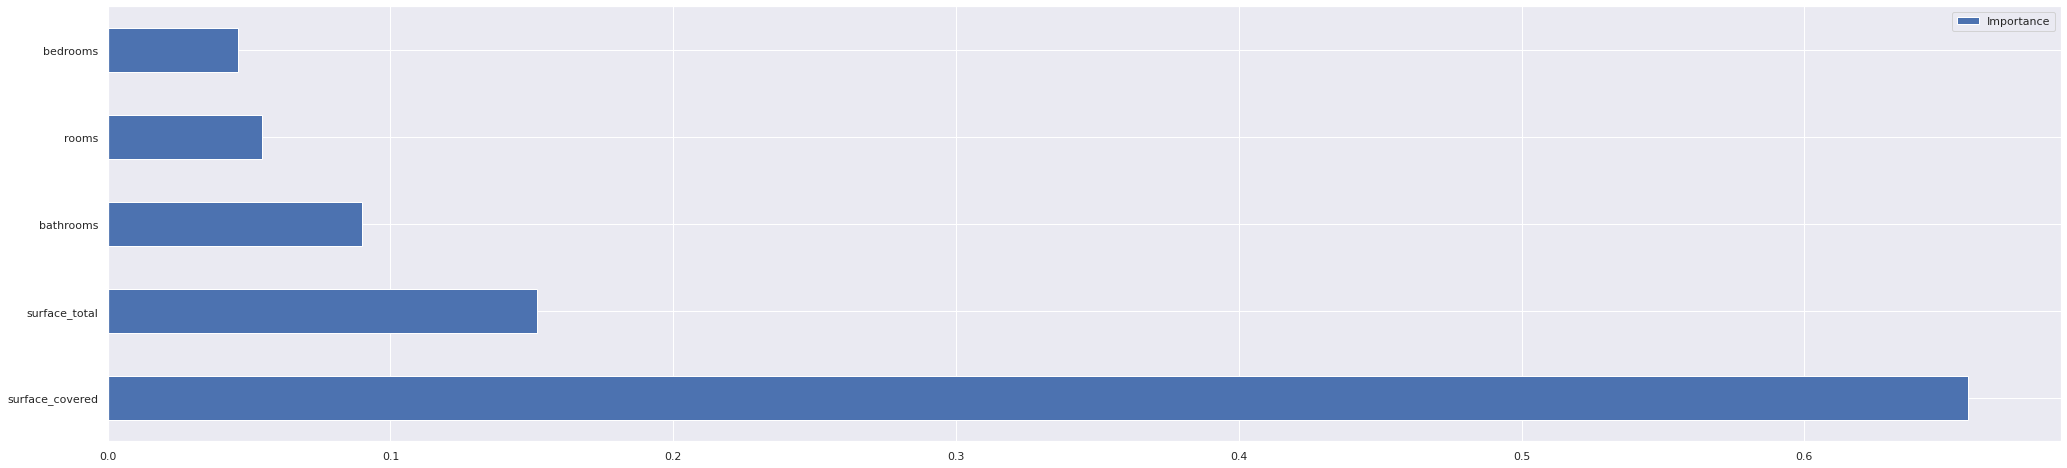

In [ ]:
importance.plot(kind='barh')


In [ ]:
X = properati_nuevo_df.drop(["price","bathrooms","rooms","bedrooms","surface_total"],axis = 1) # se deja solo los datos mas importantes
y = properati_nuevo_df.price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 1) (56713,) (24306, 1) (24306,)


**Definimos los modelos y entrenamos**

In [ ]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=2)

In [ ]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [ ]:
print(linear_model.coef_, linear_model.intercept_)

[756.47539958] 199702.67773702735


**graficamos**

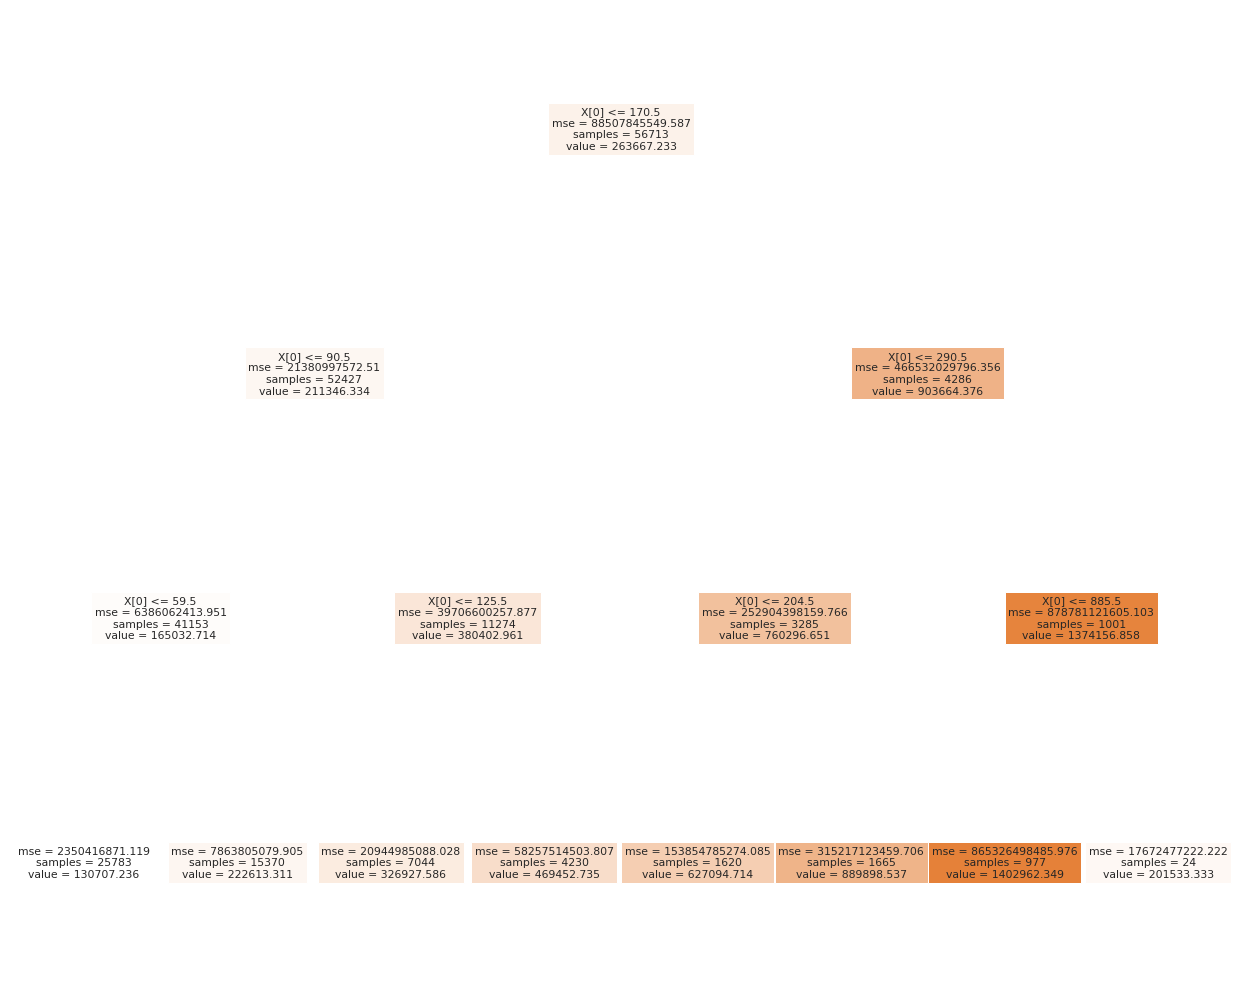

In [ ]:
plt.figure(figsize = (22,18))
tree.plot_tree(tree_regressor, filled = True)
plt.show()

**Errores de Y**

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 279497.0540674159
Raíz del error cuadrático medio en Test: 303193.23292185785


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


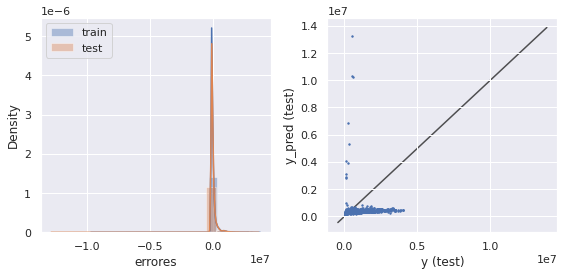

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 196748.6782730681
Raíz del error cuadrático medio en Test: 198715.73855527551


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


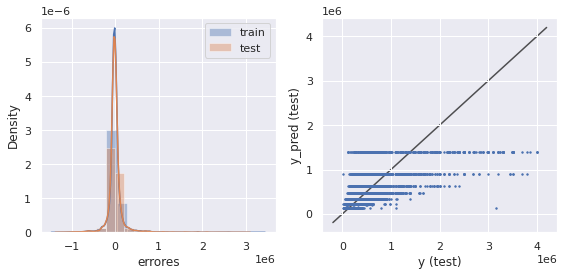

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 198194.00258429666
Raíz del error cuadrático medio en Test: 216897.4244850429


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


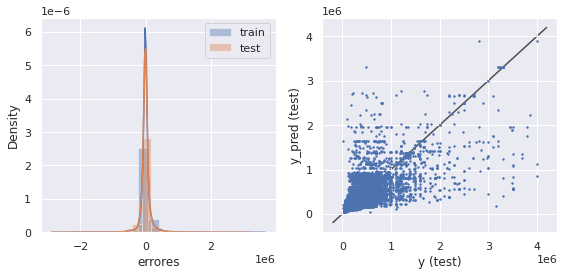

In [ ]:
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

**Definición de modelos por separado, para corroborar la Raíz del error cuadrático medio**

In [ ]:
# Regresión lineal

linear_model = LinearRegression() #definimos modelo
linear_model.fit(X_train, y_train) #entrenamos modelo
y_train_pred = linear_model.predict(X_train) #predicimos modelo
y_test_pred = linear_model.predict(X_test) #predecimos modelo

# Métricas de Evaluación para Regresión
rmse_train_linear = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_linear = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(rmse_train_linear)
print(rmse_test_linear)

# se corrobora que los errores de las graficas son correctos.

279497.0540674159
303193.23292185785


In [ ]:
# Arbol de decision

tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42) #definimos modelo
tree_regressor.fit(X_train, y_train) #entrenamos modelo
y_train_pred = tree_regressor.predict(X_train) #predicimos modelo
y_test_pred = tree_regressor.predict(X_test) #predecimos modelo

# Métricas de Evaluación para Regresión
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(rmse_train_tree)
print(rmse_test_tree)

196748.6782730681
198715.73855527551


In [ ]:
# K-NN

knn_regressor = KNeighborsRegressor(n_neighbors=2) #definimos modelo
knn_regressor.fit(X_train, y_train) #entrenamos modelo
y_train_pred = knn_regressor.predict(X_train) #predicimos modelo
y_test_pred = knn_regressor.predict(X_test) #predecimos modelo

# Métricas de Evaluación para Regresión
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(rmse_train_knn)
print(rmse_test_knn)

198194.00258429666
216897.4244850429


In [ ]:
#resumen de Raíz del error cuadrático medio

resumen_hiperparametros_manuales = {"Hiperparametro":["Manual", "Manual", "Manual"],"Modelo":["linear","Arbol","K-NN"],
                                    "RMSE train": [rmse_train_linear,rmse_train_tree,rmse_train_knn],
                                    "RMSE Test":[rmse_test_linear,rmse_test_tree,rmse_test_knn]}
resumen_hiperparametros_manuales_df = pd.DataFrame(resumen_hiperparametros_manuales)
resumen_hiperparametros_manuales_df

Hiperparametro  Modelo     RMSE train      RMSE Test
0         Manual  linear  279497.054067  303193.232922
1         Manual   Arbol  196748.678273  198715.738555
2         Manual    K-NN  198194.002584  216897.424485

**Optimizacion de hiperparametros**

**optimización para K-NN**

In [ ]:
# Definimos las listas vacias para los valores de RMSE deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors=k)
        
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

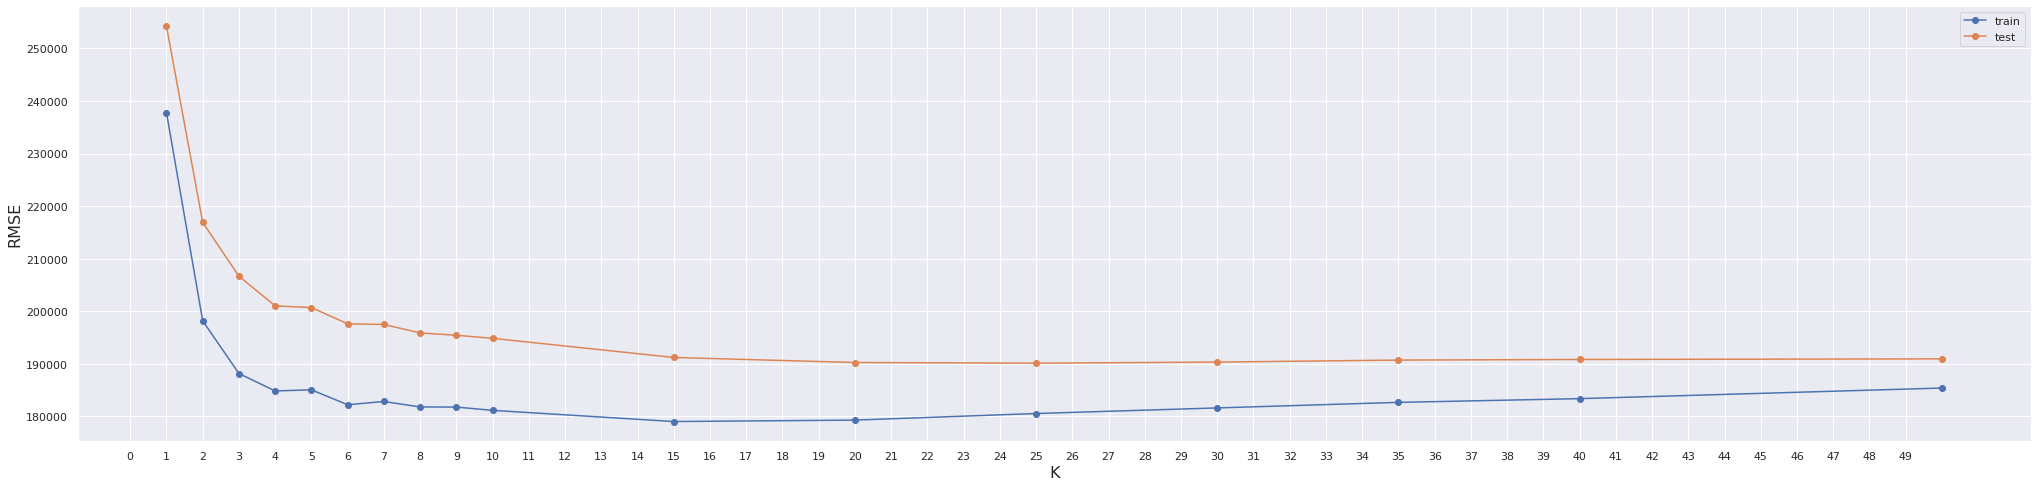

In [ ]:
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test')
plt.ylabel('RMSE', fontsize=16) 
plt.xlabel('K', fontsize=16) 
plt.xticks(np.arange(0, 50, step=1))
plt.legend()

#concluimos que la mejor es K=40

**Optimización  Arbol de decisión**

In [ ]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = np.arange(1,20)

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    clf = DecisionTreeRegressor(max_depth= max_depth, random_state=42)
    
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

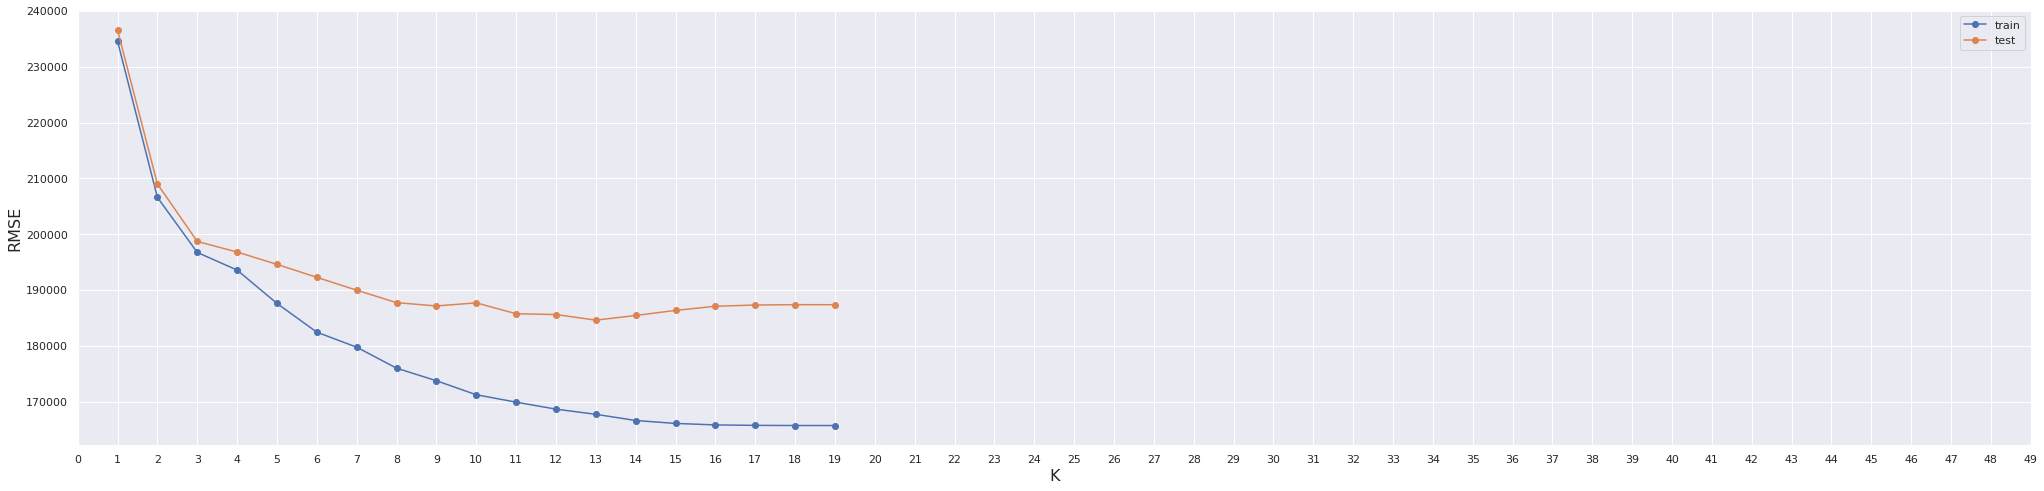

In [ ]:
plt.plot(max_depths,lista_rmse_train,'o-',label='train' )
plt.plot(max_depths,lista_rmse_test,'o-',label='test')
plt.ylabel('RMSE', fontsize=16) 
plt.xlabel('K', fontsize=16) 
plt.xticks(np.arange(0, 50, step=1))
plt.legend()

# el mejor valor de profundidad es 4

In [ ]:
# Arbol de decision optimizado

tree_regressor_optimizado = DecisionTreeRegressor(max_depth=40, random_state=42) #definimos modelo
tree_regressor_optimizado.fit(X_train, y_train) #entrenamos modelo
y_train_pred_optimizado = tree_regressor_optimizado.predict(X_train) #predicimos modelo
y_test_pred_optimizado = tree_regressor_optimizado.predict(X_test) #predecimos modelo

# Métricas de Evaluación para Regresión
rmse_train_tree_optimizado = np.sqrt(mean_squared_error(y_train, y_train_pred_optimizado))
rmse_test_tree_optimizado = np.sqrt(mean_squared_error(y_test, y_test_pred_optimizado))

print(rmse_train_tree_optimizado)
print(rmse_test_tree_optimizado)

165744.55833459808
187387.3926623939


In [ ]:
# K-NN optimizado

knn_regressor_optimizado = KNeighborsRegressor(n_neighbors=4) #definimos modelo
knn_regressor_optimizado.fit(X_train, y_train) #entrenamos modelo
y_train_pred_optimizado = knn_regressor_optimizado.predict(X_train) #predicimos modelo
y_test_pred_optimizado = knn_regressor_optimizado.predict(X_test) #predecimos modelo

# Métricas de Evaluación para Regresión
rmse_train_knn_optimizado = np.sqrt(mean_squared_error(y_train, y_train_pred_optimizado))
rmse_test_knn_optimizado = np.sqrt(mean_squared_error(y_test, y_test_pred_optimizado))

print(rmse_train_knn_optimizado)
print(rmse_test_knn_optimizado)

184859.68275089184
201035.2891020694


In [ ]:
#resumen de Raíz del error cuadrático medio

resumen_hiperparametros_manuales = {"Hiperparametro":["Manual", "Manual", "Manual","Optimizado","Optimizado","Optimizado"],
                                    "Modelo":["linear","Arbol","K-NN","linear","Arbol","K-NN"],
                                    "RMSE train": [rmse_train_linear,rmse_train_tree,rmse_train_knn,"N.A",rmse_train_tree_optimizado,rmse_train_knn_optimizado],
                                    "RMSE Test":[rmse_test_linear,rmse_test_tree,rmse_test_knn, "N.A", rmse_test_tree_optimizado, rmse_test_knn_optimizado]}
resumen_hiperparametros_manuales_df = pd.DataFrame(resumen_hiperparametros_manuales)
resumen_hiperparametros_manuales_df

Hiperparametro  Modelo RMSE train RMSE Test
0         Manual  linear     279497    303193
1         Manual   Arbol     196749    198716
2         Manual    K-NN     198194    216897
3     Optimizado  linear        N.A       N.A
4     Optimizado   Arbol     165745    187387
5     Optimizado    K-NN     184860    201035

In [ ]:
# El modelo de benchmark sigue dando error cuadraticos menores a los del modelo linear, arbol o k-nn.
# el barrio y el tipo de propiedad son variables claves para poder tener un mejor modelo.
# finalmente entre los modelos que se optimizaron, escogeria  k-nn por dos razones:
# 1. es la que menor RMSE tiene y 2. porque es la que menos diferencia tiene entre test y train.